In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/jared/Library/Group Containers/UBF8T346G9.OneDriveStandaloneSuite/OneDrive.noindex/OneDrive/Documents/University stuff/Masters Year/DS4I/Assignment2_code/project':
  os.chdir(r'/Users/jared/Library/Group Containers/UBF8T346G9.OneDriveStandaloneSuite/OneDrive.noindex/OneDrive/Documents/University stuff/Masters Year/DS4I/Assignment2_code/project')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/v7/l0jq1cbd0fnf4ytmwzksxt0r0000gn/T/ipykernel_50693/782715493.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/importlib/_bootstrap.py": 1687560475.899881, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/importlib/_bootstrap_external.py": 1687560475.905339, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/codecs.py": 1687560473.470777, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/encodings/aliases.py": 1687560474.989399, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/encodings/__init__.py": 1687560474.985129, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/encodings/utf_8.py": 1687560475.43757, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/abc.py": 1687560473.346976, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/io.py": 1687560473.627098, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/stat.py": 1687560473.825673, "/Users/jared/opt/anaconda3/envs/scientificProject/lib/python3.10/_

In [2]:
# TODO AT THE END!
a = 1

In [3]:
# Loading in the necessary libraries
import zipfile
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from itertools import cycle
import seaborn as sns
import numpy as np
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords, words
from nltk.stem import WordNetLemmatizer

In [4]:
# Unzip the file and get the list of filenames
with zipfile.ZipFile("data/speeches.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

filenames = os.listdir("data")
filenames = [filename for filename in filenames if filename.endswith('.txt')]

# Read the content of each speech file and extract the date from the first line
speeches = []
dates = []
for filename in filenames:
    with open(os.path.join("data", filename), 'r', encoding='utf-8') as file:
        # Extract date from the first line
        date = file.readline().strip()
        dates.append(date)
        
        # Read the rest of the file
        speeches.append(file.read())

# Create DataFrame
sona = pd.DataFrame({'filename': filenames, 'speech': speeches, 'date': dates})

# Extract year and president for each speech
sona['year'] = sona['filename'].str[:4]
sona['president'] = sona['filename'].str.split('_').str[-1].str.split('.').str[0]

# Clean the sona dataset by removing unnecessary text
replace_reg = r'(http.*?(\s|.$))|(www.*?(\s|.$))|&amp;|&lt;|&gt;|\n'
sona['speech'] = sona['speech'].str.replace(replace_reg, ' ')

# Split speeches into sentences
sona_sentences = sona.copy()

sona_sentences['speech'] = sona_sentences['speech'].str.replace('\n', '').str.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s')

# Make a csv of the speeches
sona.to_csv('data/sona_speeches.csv', index=False)

In [5]:
# Make sure to download the necessary NLTK corpus if you haven't already
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('words')

# Read in the sona speeches dataset
sona_speeches_df = pd.read_csv('data/sona_speeches.csv')
sona_sentences_clean = sona_sentences.copy()

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
english_words = set(words.words())
additional_words = {
    'honourable', 'member', 'south', 'africa', 'african', 'year'
}

# Function to convert NLTK's part-of-speech tags to WordNet's part-of-speech tags
def get_wordnet_pos(word):
    """Map NLTK part of speech tags to WordNet part of speech tags."""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

# Clean the text, convert to lowercase, and lemmatize each word
def clean_text(text):
    # Remove special characters: keep only letters, numbers, and basic punctuation
    text = re.sub(r'[.;]', ' ', text)  # Replaces periods with spaces
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()  # Convert to lowercase
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    # Remove additional words
    words = [word for word in words if word not in additional_words]

    # Lemmatize each word with the correct POS tag
    lemmatized_words = []
    for word, tag in nltk.pos_tag(words):
        wntag = get_wordnet_pos(tag)
        lemmatized_word = lemmatizer.lemmatize(word, wntag)
        # Only append the lemmatized word if it is in the set of English words
        if lemmatized_word in english_words:
            lemmatized_words.append(lemmatized_word)
    
    # Join the lemmatized words back into one string
    text = ' '.join(words)
    return text

# Apply the cleaning function to the speech column
sona_speeches_df['speech'] = sona_speeches_df['speech'].apply(clean_text)

# Apply the cleaning to the sentences too
sona_sentences_clean['speech'] = sona_sentences_clean['speech'].apply(lambda speeches: [clean_text(sentence) for sentence in speeches])

# Make a csv of the speeches
sona_speeches_df.to_csv('data/sona_speeches_adapted.csv', index=False)

# Make a csv of the sentences
sona_sentences_clean.to_csv('data/sona_sentences_clean.csv', index=False)

In [6]:
from ast import literal_eval

sona_sentences_clean = pd.read_csv('data/sona_sentences_clean.csv')
sona_sentences_clean['speech'] = sona_sentences_clean['speech'].apply(literal_eval)

sona_speeches_clean = pd.read_csv('data/sona_speeches_adapted.csv')

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Transformed on the words
bow_matrix_words = vectorizer.fit_transform(sona_speeches_clean['speech'])
tfidf_matrix_words = tfidf_vectorizer.fit_transform(sona_speeches_clean['speech'])


In [8]:
from matplotlib.colors import LinearSegmentedColormap

cmap = plt.cm.cividis

norm = plt.Normalize(0, 100)

# Define a colour map based on cividis
# Define a new colormap using a smaller slice of the cividis colormap, this time stopping well before the yellows
cividis_modified = cmap(np.linspace(0, 0.4, cmap.N))  # Using only 40% of the colormap range

# Create a new colormap from the data
cividis_no_yellow_light = LinearSegmentedColormap.from_list('cividis_no_yellow_light', cividis_modified)

# Let's pick three colors from the modified colormap
colors = [cividis_no_yellow_light(norm(0)), 
          cividis_no_yellow_light(norm(50)), 
          cividis_no_yellow_light(norm(100))]

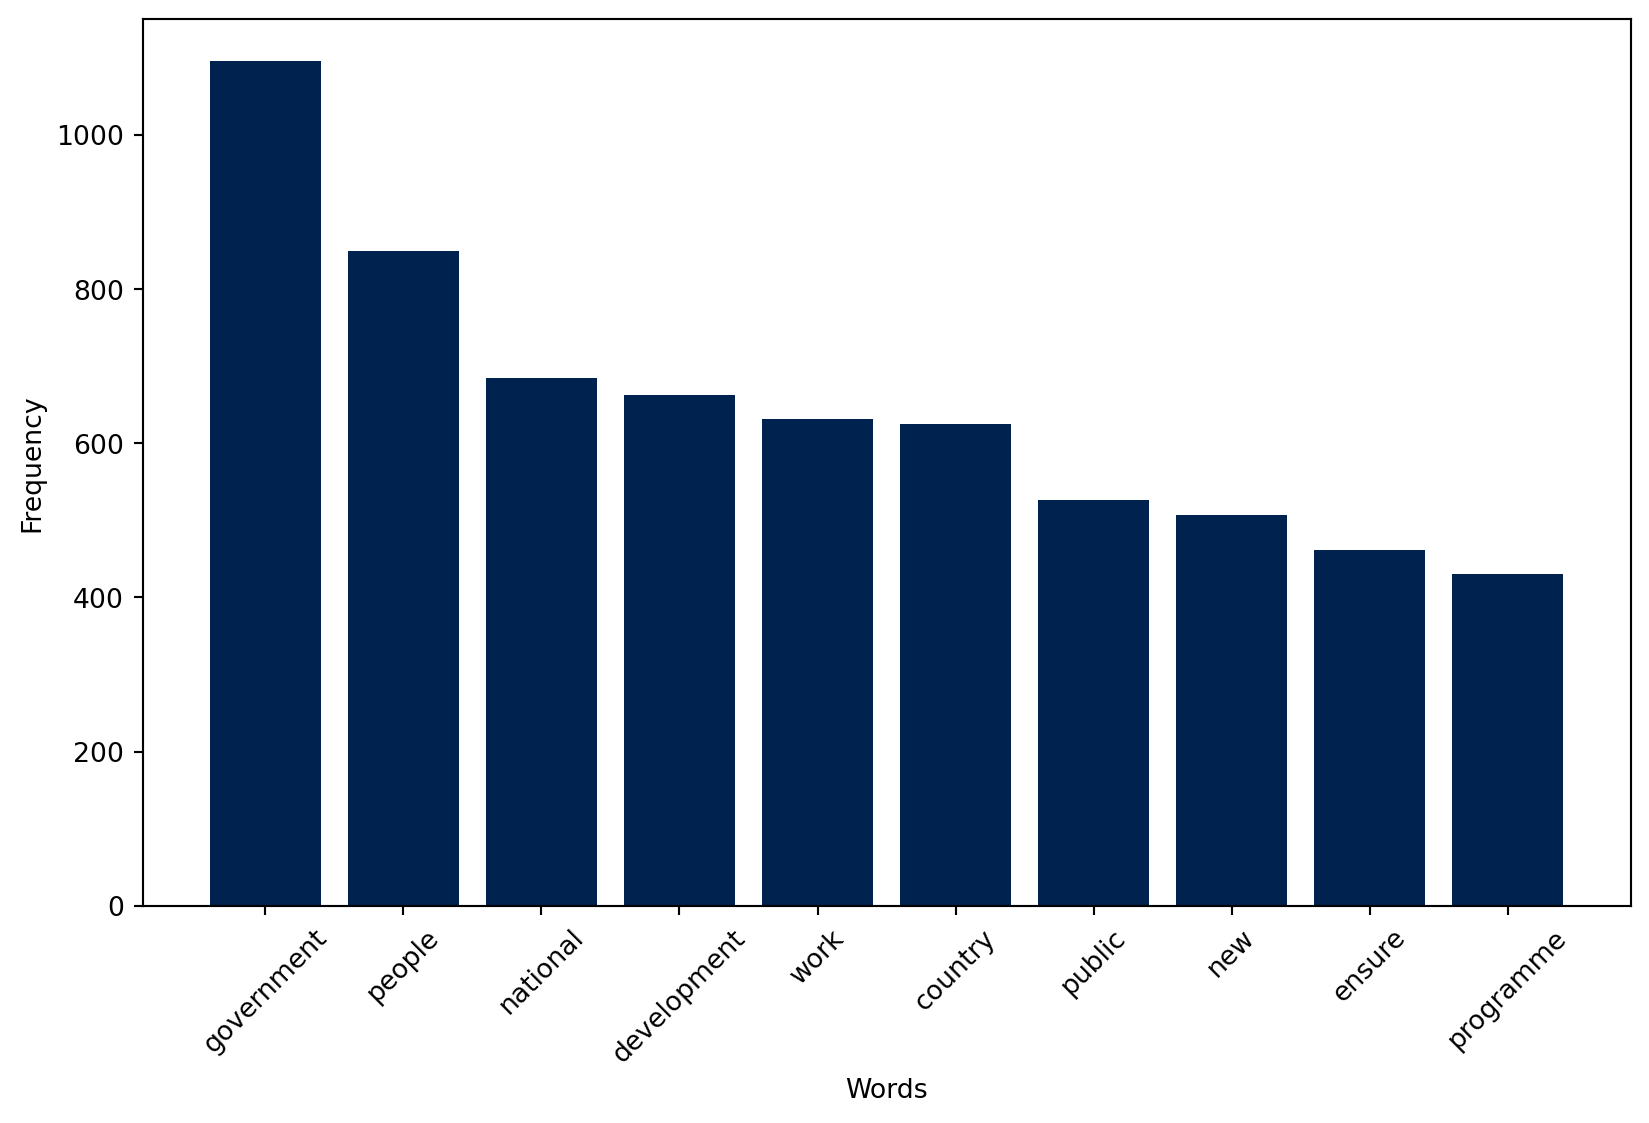

'saved_plots/top_10_words_across_speeches_chart.pdf'

In [9]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
import matplotlib.pyplot as plt

# Function to count words in speeches excluding stopwords
def get_word_frequencies(speeches, stopwords):
    word_counts = Counter()
    for speech in speeches:
        words = speech.lower().split()
        # Remove stopwords from the count
        words = [word.strip('.,!?"\'-()') for word in words if word.strip('.,!?"\'-()') not in stopwords]
        word_counts.update(words)
    return word_counts

# Get the word frequencies excluding stopwords
word_frequencies = get_word_frequencies(sona_speeches_df['speech'], ENGLISH_STOP_WORDS)

# Get the top 10 most frequent words across all speeches
top_10_words = word_frequencies.most_common(10)

cividis_no_yellow_light(norm(100))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar([word for word, count in top_10_words], [count for word, count in top_10_words], color=colors[0])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Define the directory name
directory = "saved_plots"

# Check if the directory exists
if not os.path.exists(directory):
    # If it does not exist, create it
    os.makedirs(directory)

# Now you can safely save your file within 'saved_plots' directory
pdf_filename = f'{directory}/top_10_words_across_speeches_chart.pdf'
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

# Closing the figure to prevent it from displaying again in the output
plt.close()

pdf_filename

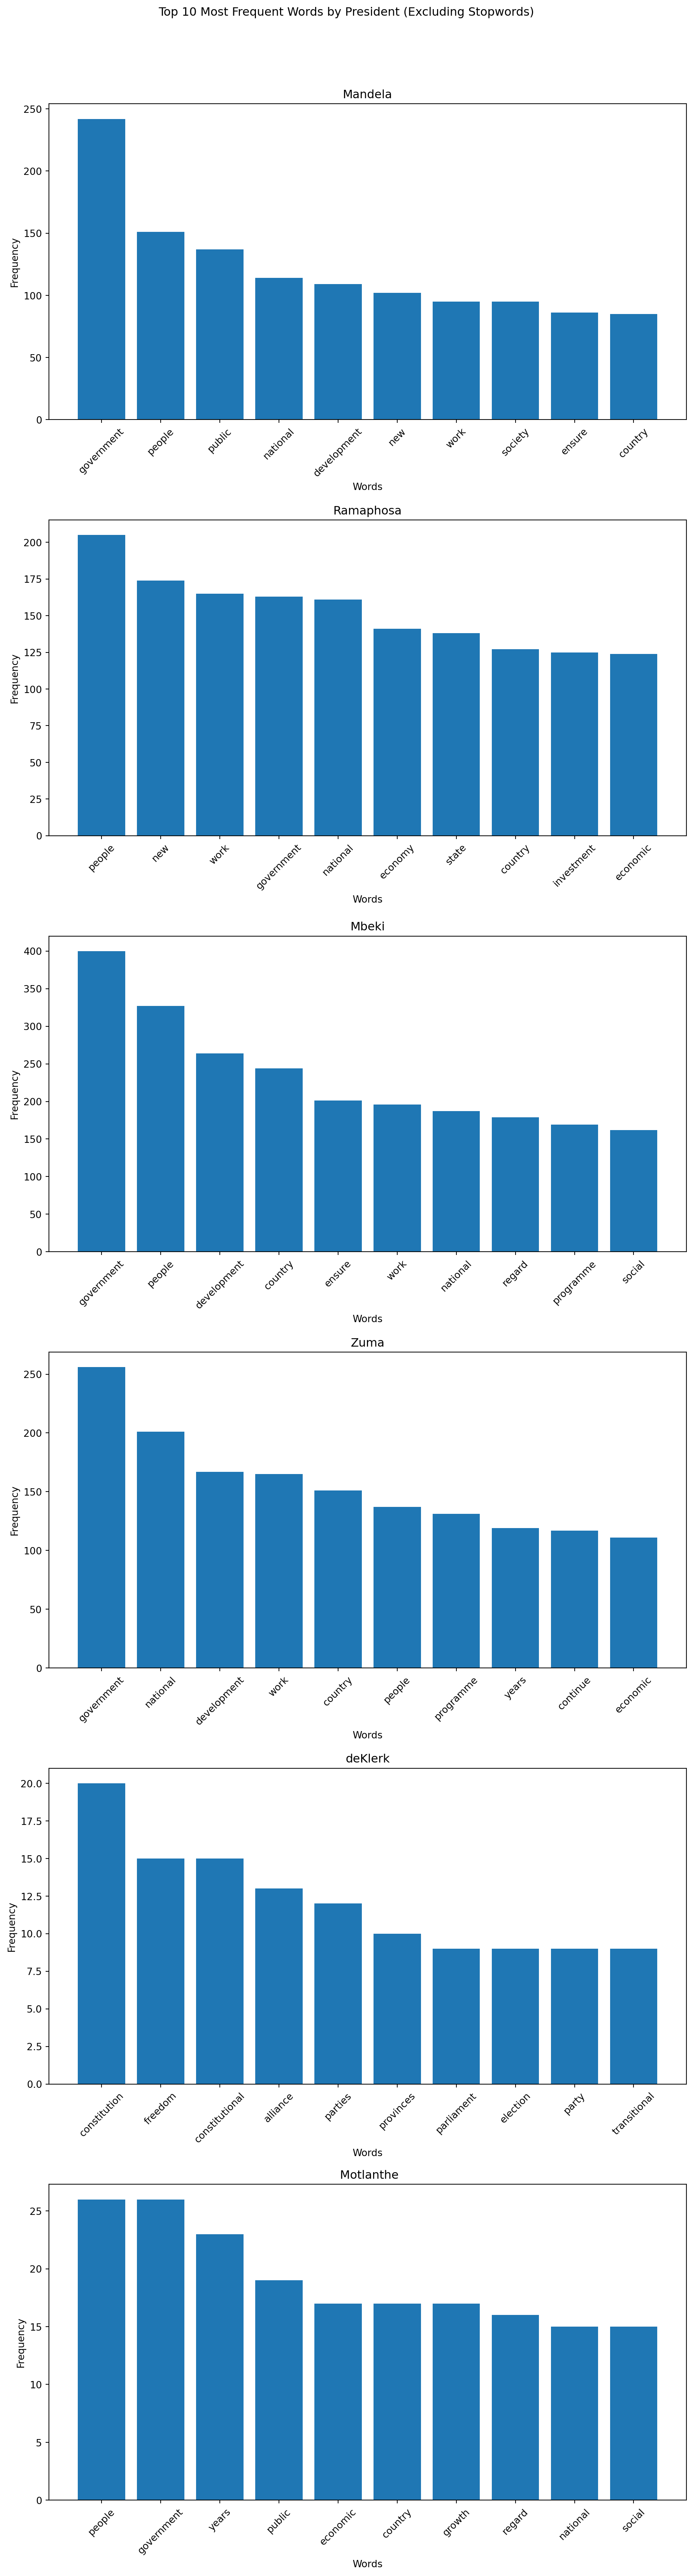

In [10]:
# Function to get top N frequent words for each president
def get_top_words_by_president(speeches_df, n, stopwords):
    presidents = speeches_df['president'].unique()
    top_words_by_president = {}
    for president in presidents:
        president_speeches = speeches_df[speeches_df['president'] == president]['speech']
        word_frequencies = get_word_frequencies(president_speeches, stopwords)
        top_words_by_president[president] = word_frequencies.most_common(n)
    return top_words_by_president

# Get the top 10 most frequent words for each president
top_10_words_by_president = get_top_words_by_president(sona_speeches_df, 10, ENGLISH_STOP_WORDS)

# Plotting the bar graph for the top 10 most frequent words faceted by president
fig, axes = plt.subplots(nrows=len(top_10_words_by_president), ncols=1, figsize=(10, 6 * len(top_10_words_by_president)))
fig.suptitle('Top 10 Most Frequent Words by President (Excluding Stopwords)', y=1.02)

for i, (president, top_words) in enumerate(top_10_words_by_president.items()):
    axes[i].bar([word for word, count in top_words], [count for word, count in top_words])
    axes[i].set_title(president)
    axes[i].set_xlabel('Words')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


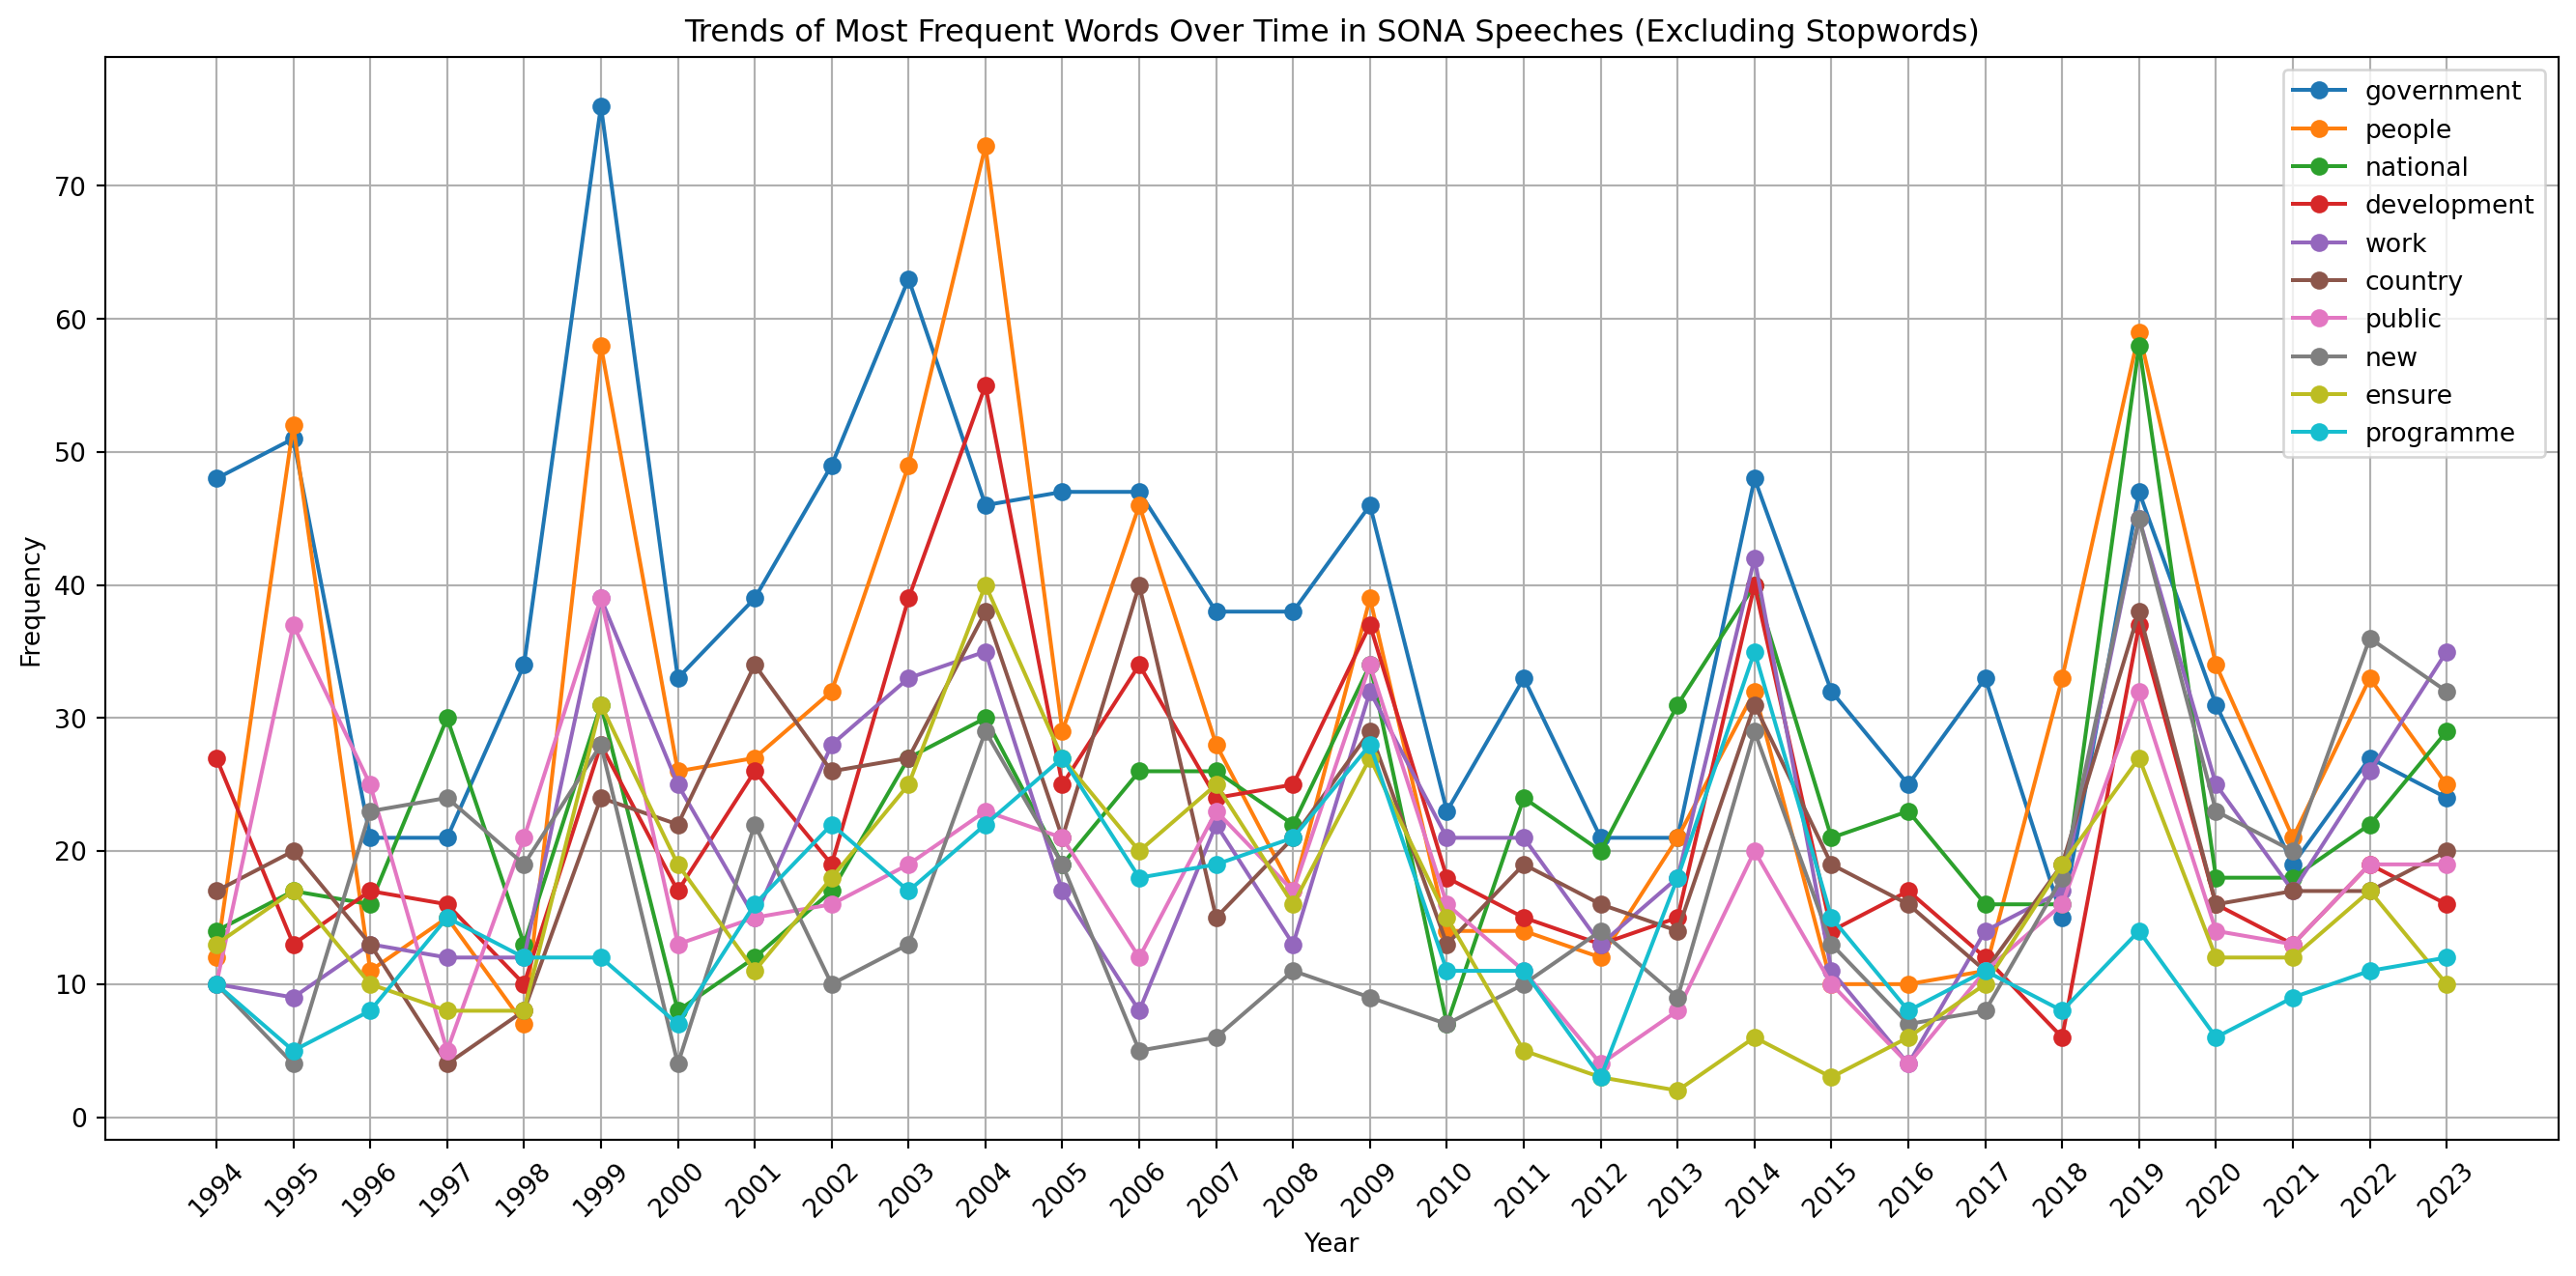

In [11]:
# We will first identify the overall top words to track over time.
overall_top_words = [word for word, count in top_10_words]

# Function to get yearly frequency of specific words
def get_yearly_word_trends(speeches_df, words):
    yearly_word_trends = {word: [] for word in words}
    years = sorted(speeches_df['year'].unique())
    
    for year in years:
        year_speeches = speeches_df[speeches_df['year'] == year]['speech']
        word_counts = get_word_frequencies(year_speeches, ENGLISH_STOP_WORDS)
        for word in words:
            yearly_word_trends[word].append(word_counts[word])
    
    return years, yearly_word_trends

# Get the yearly trends for the overall top words
years, yearly_word_trends = get_yearly_word_trends(sona_speeches_df, overall_top_words)

# Plotting the line graph for how the most frequent words trend over time across speeches
plt.figure(figsize=(14, 7))

for word in overall_top_words:
    plt.plot(years, yearly_word_trends[word], label=word, marker='o')

plt.title('Trends of Most Frequent Words Over Time in SONA Speeches (Excluding Stopwords)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


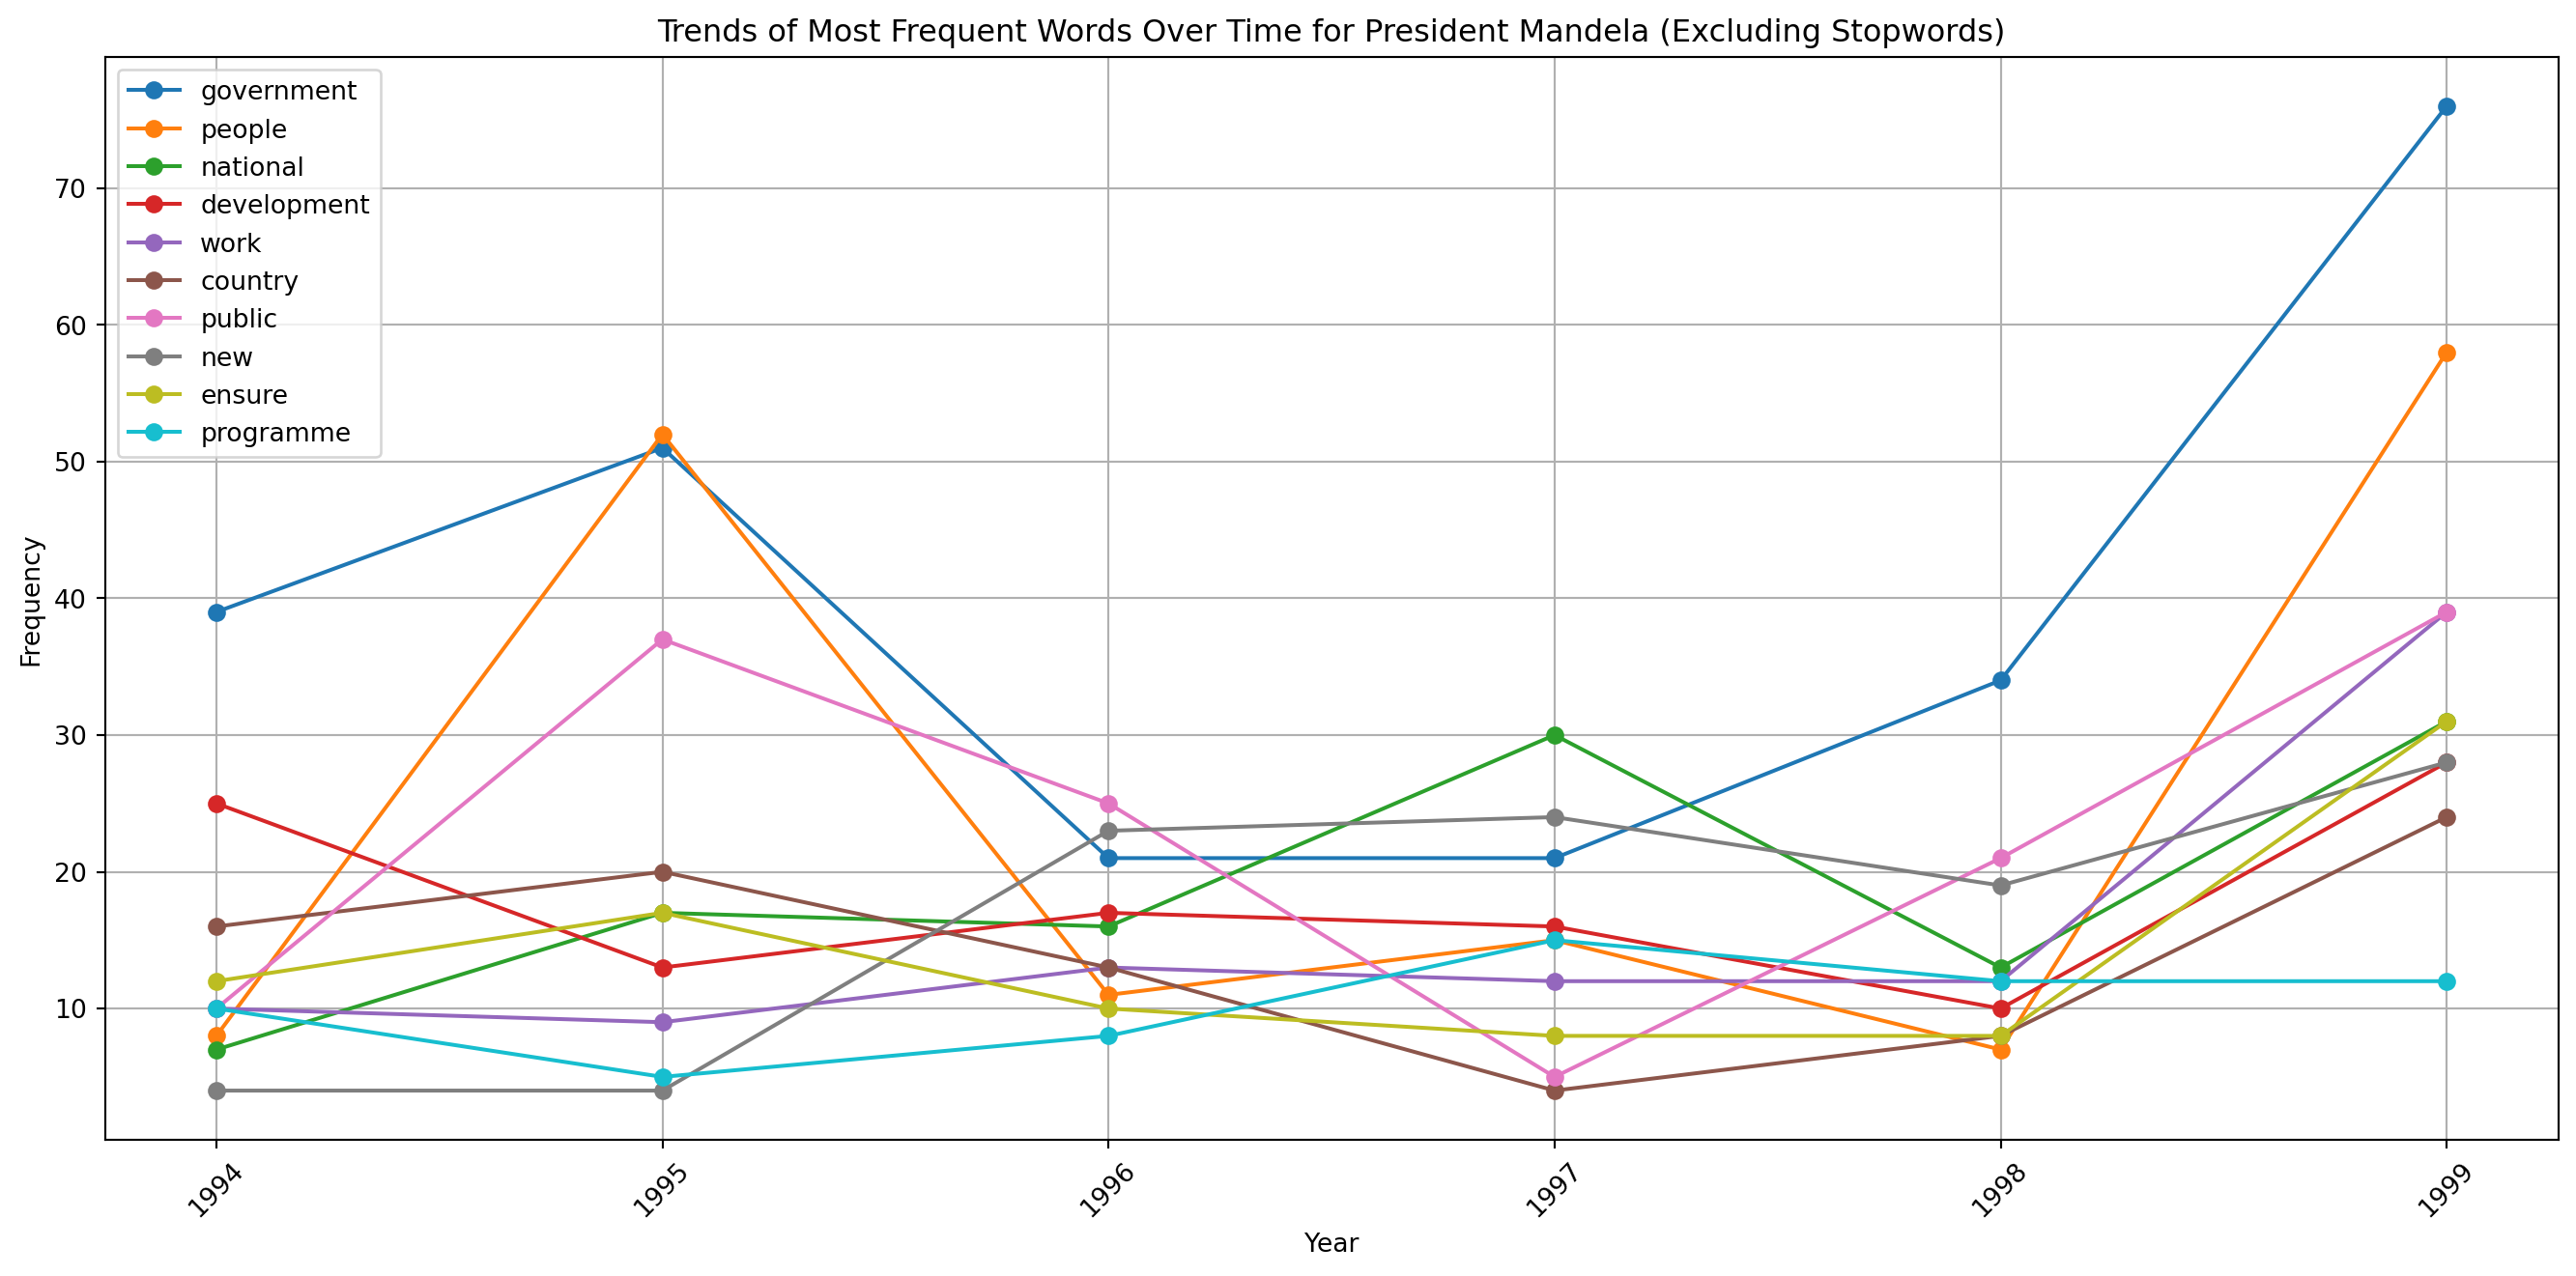

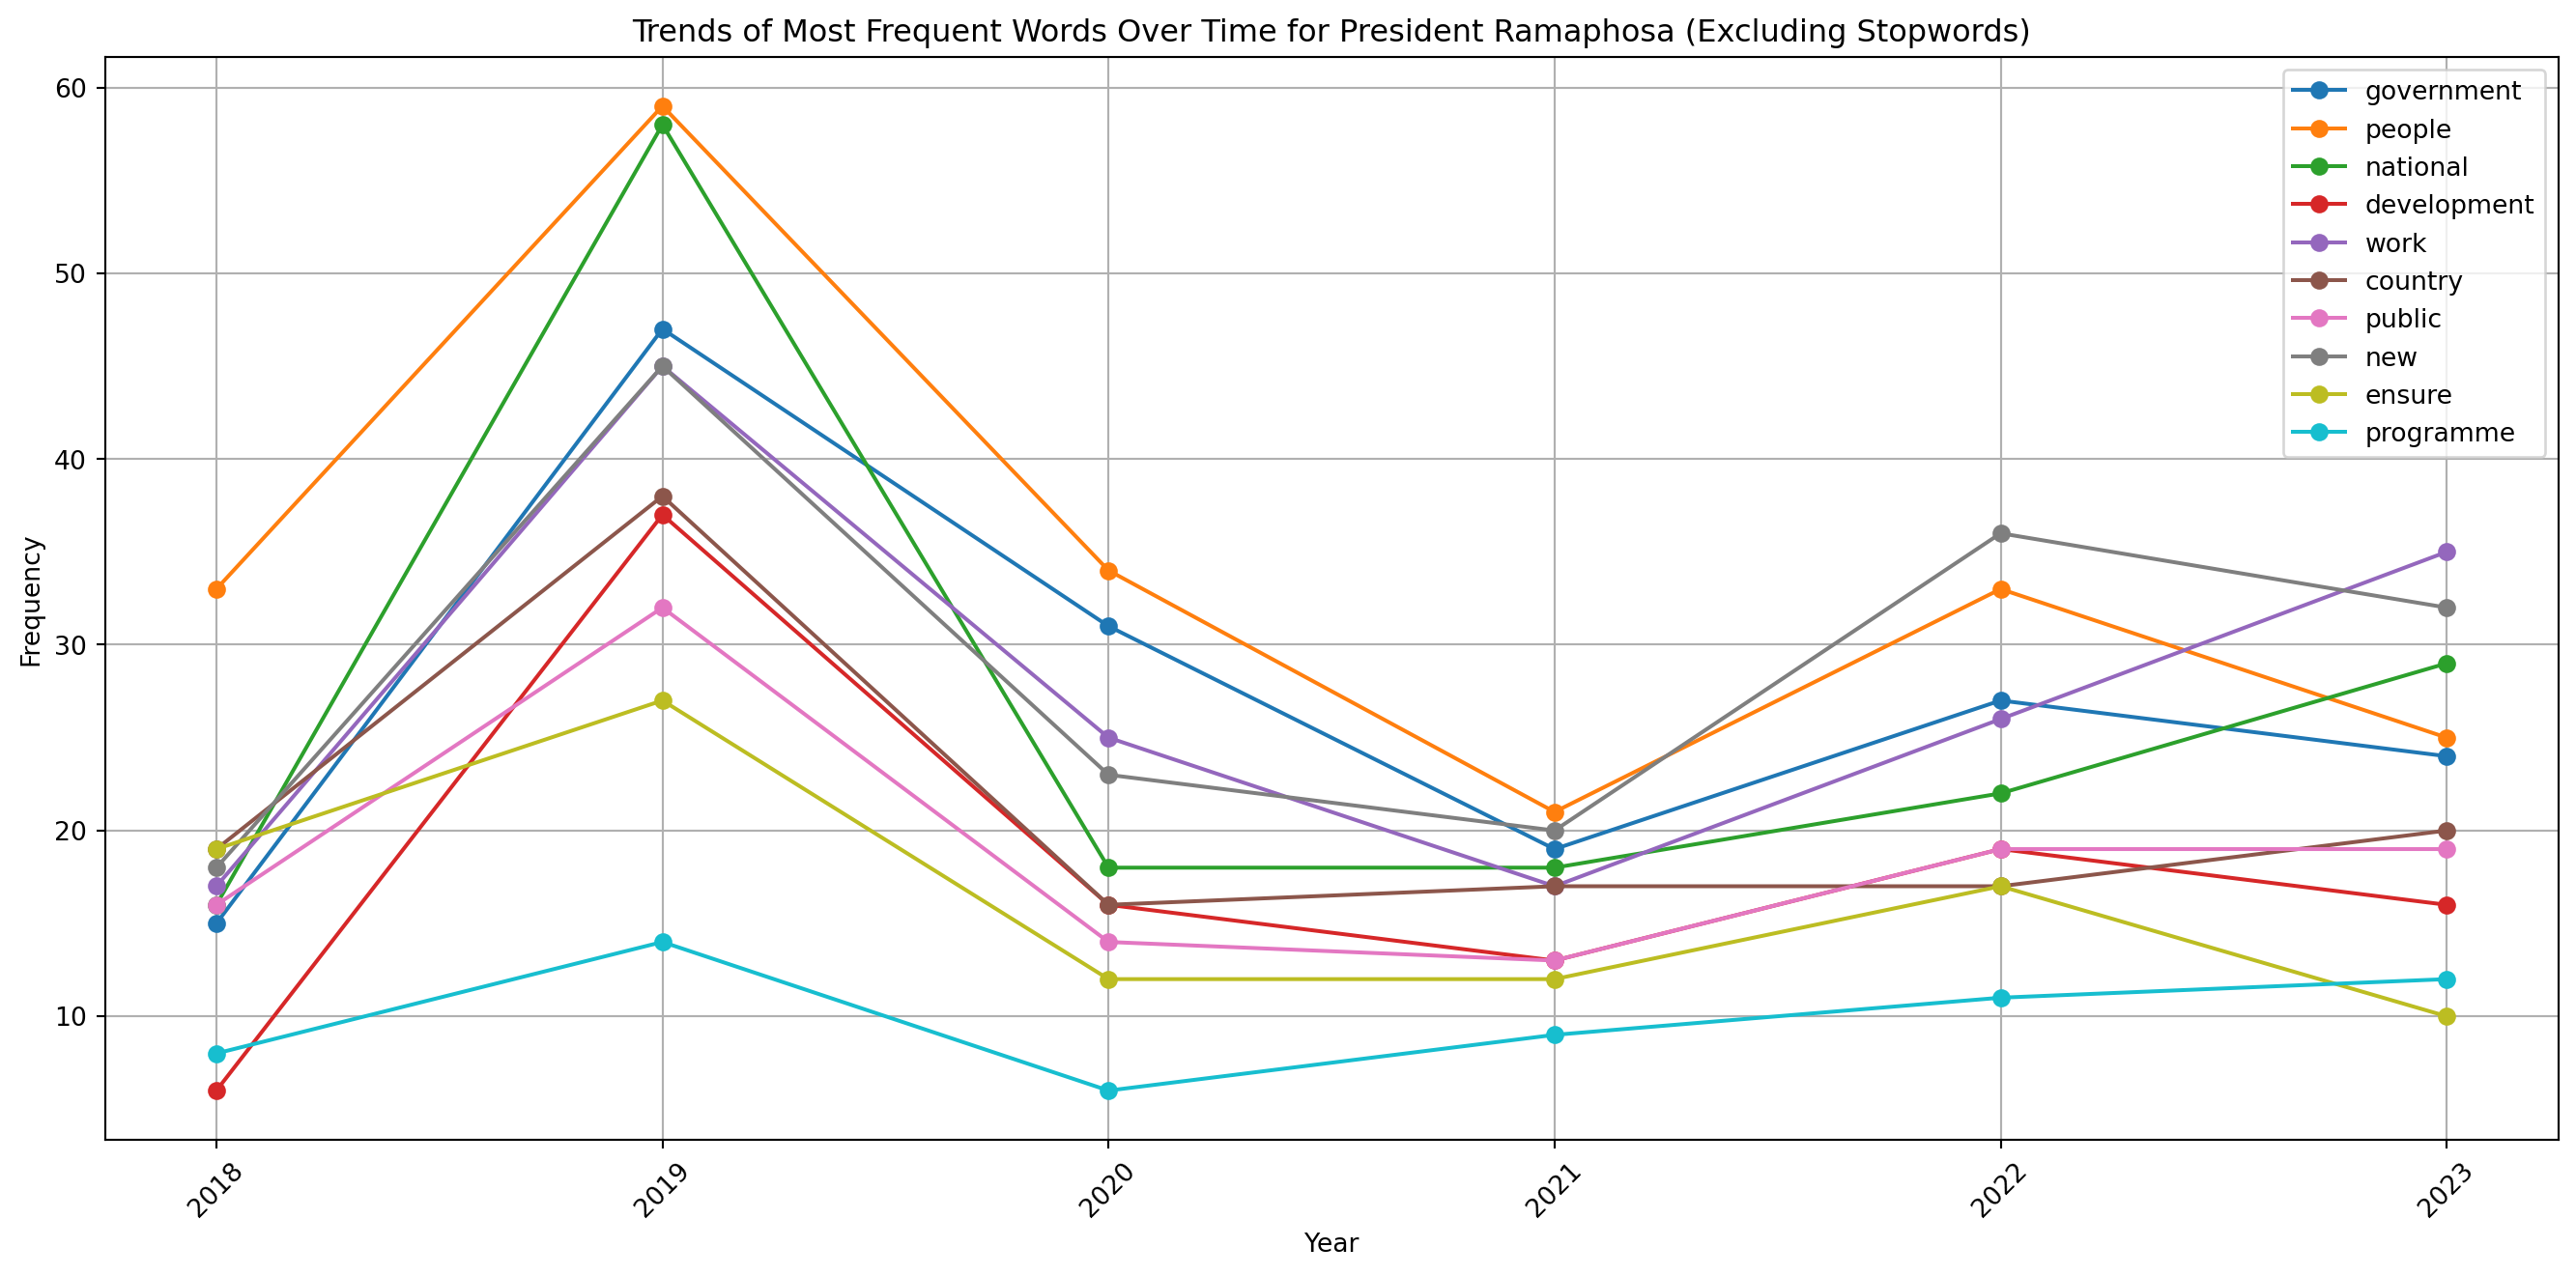

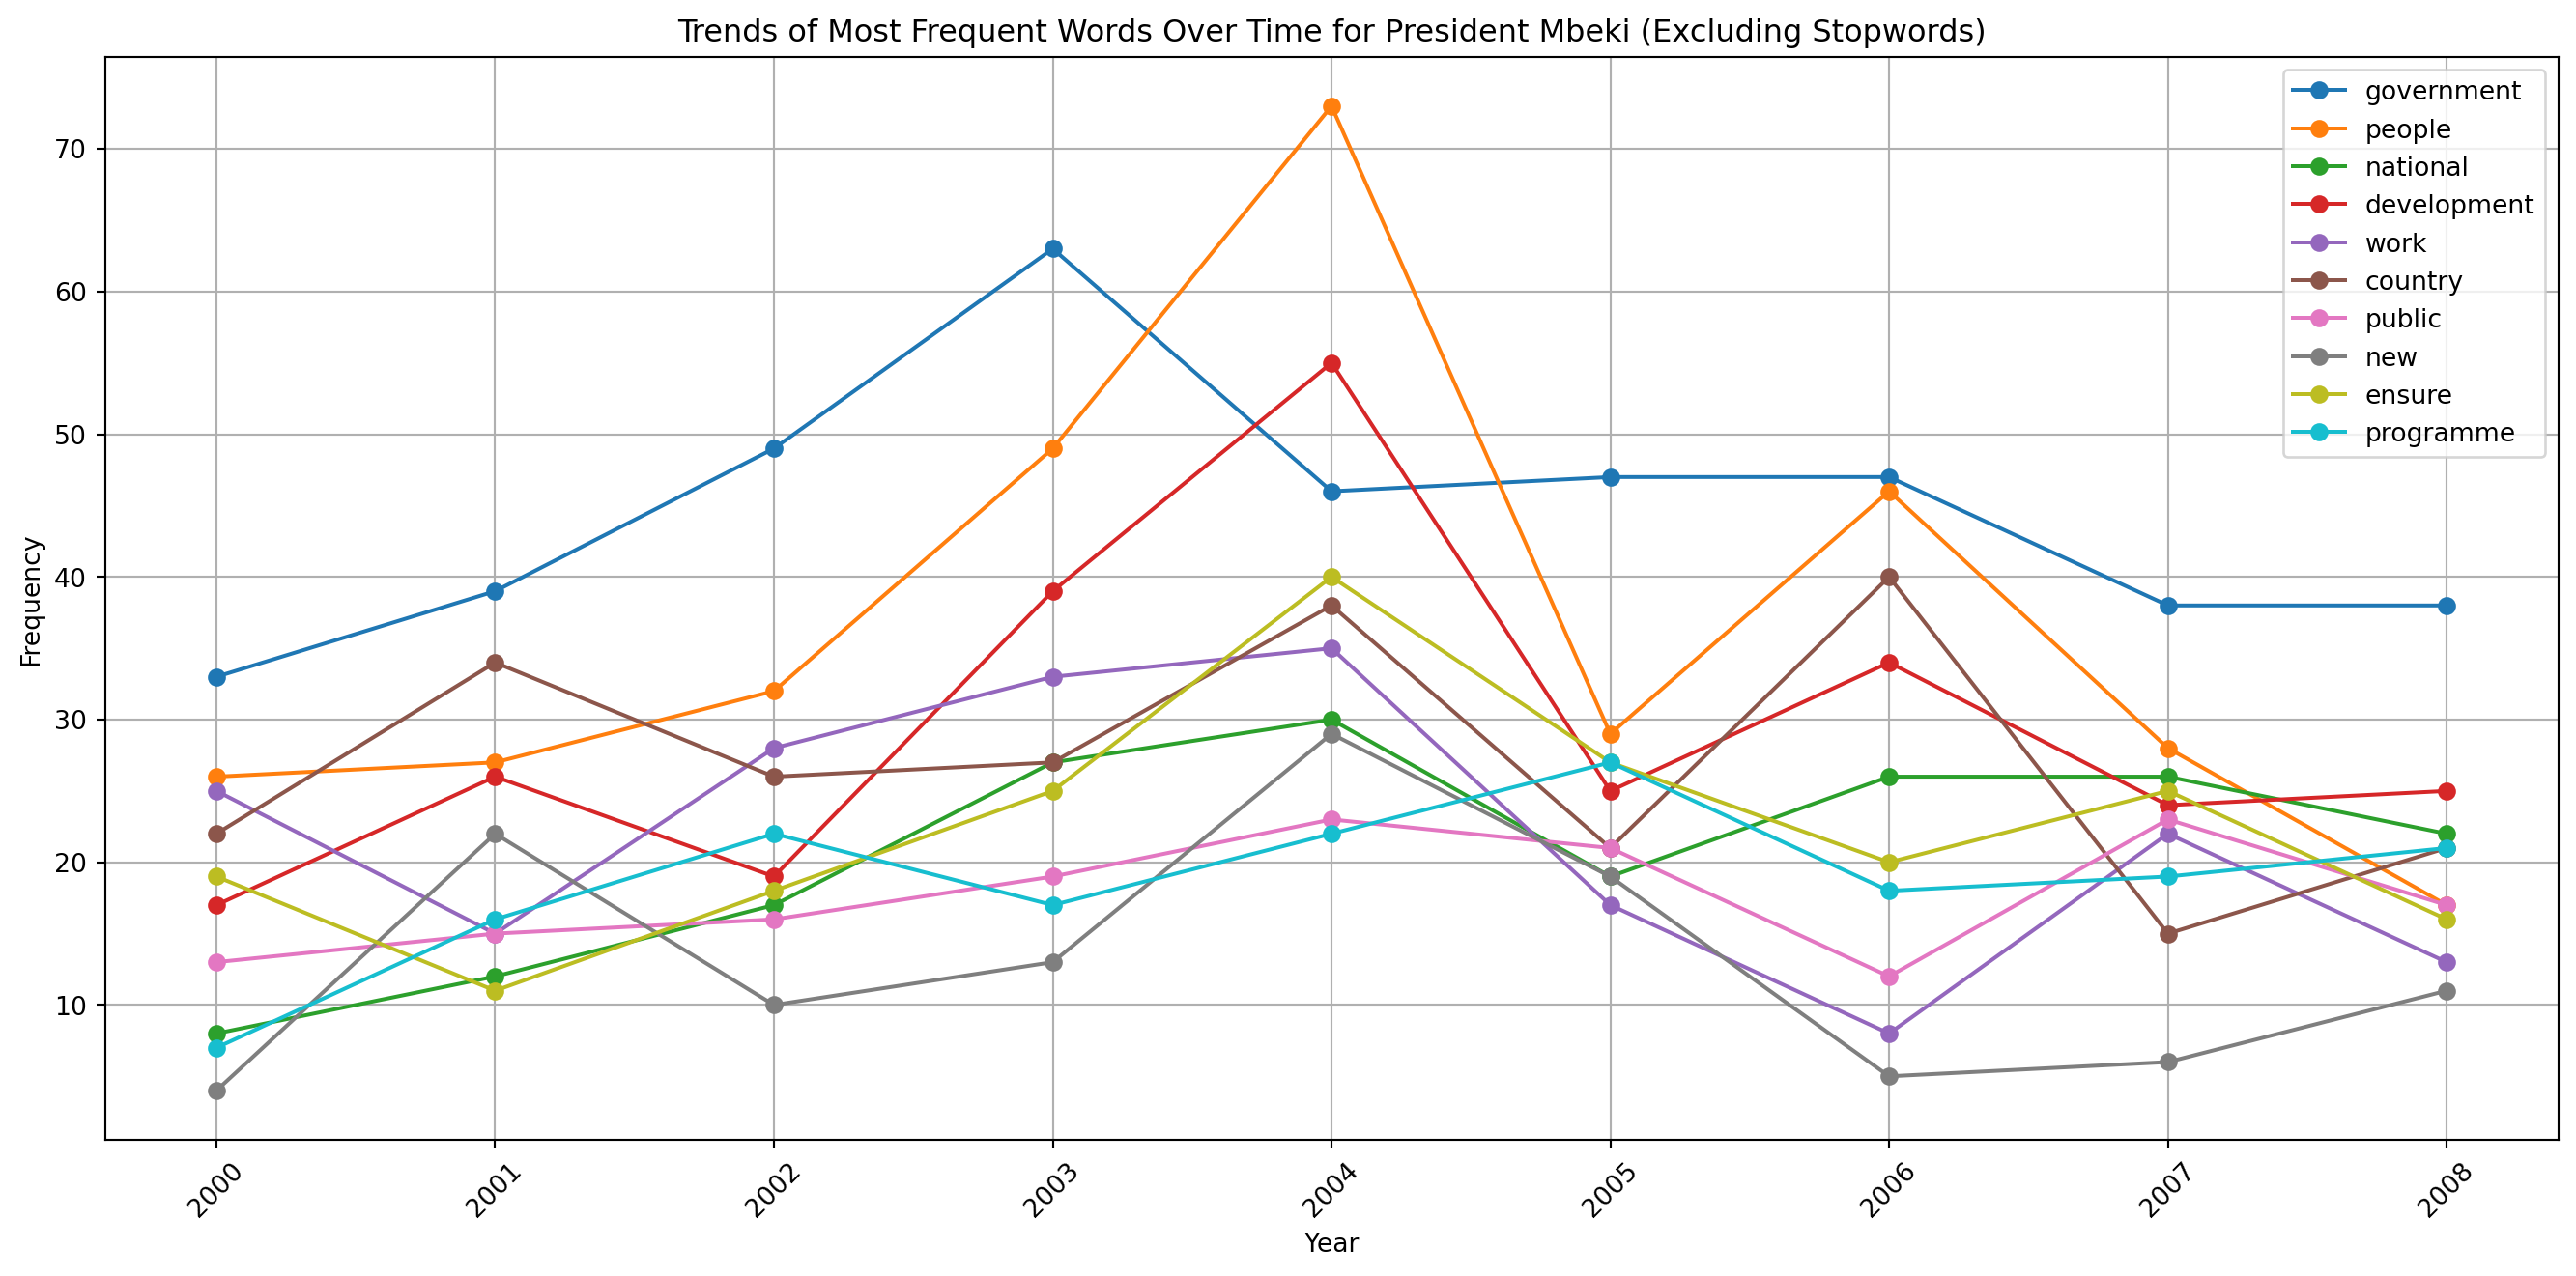

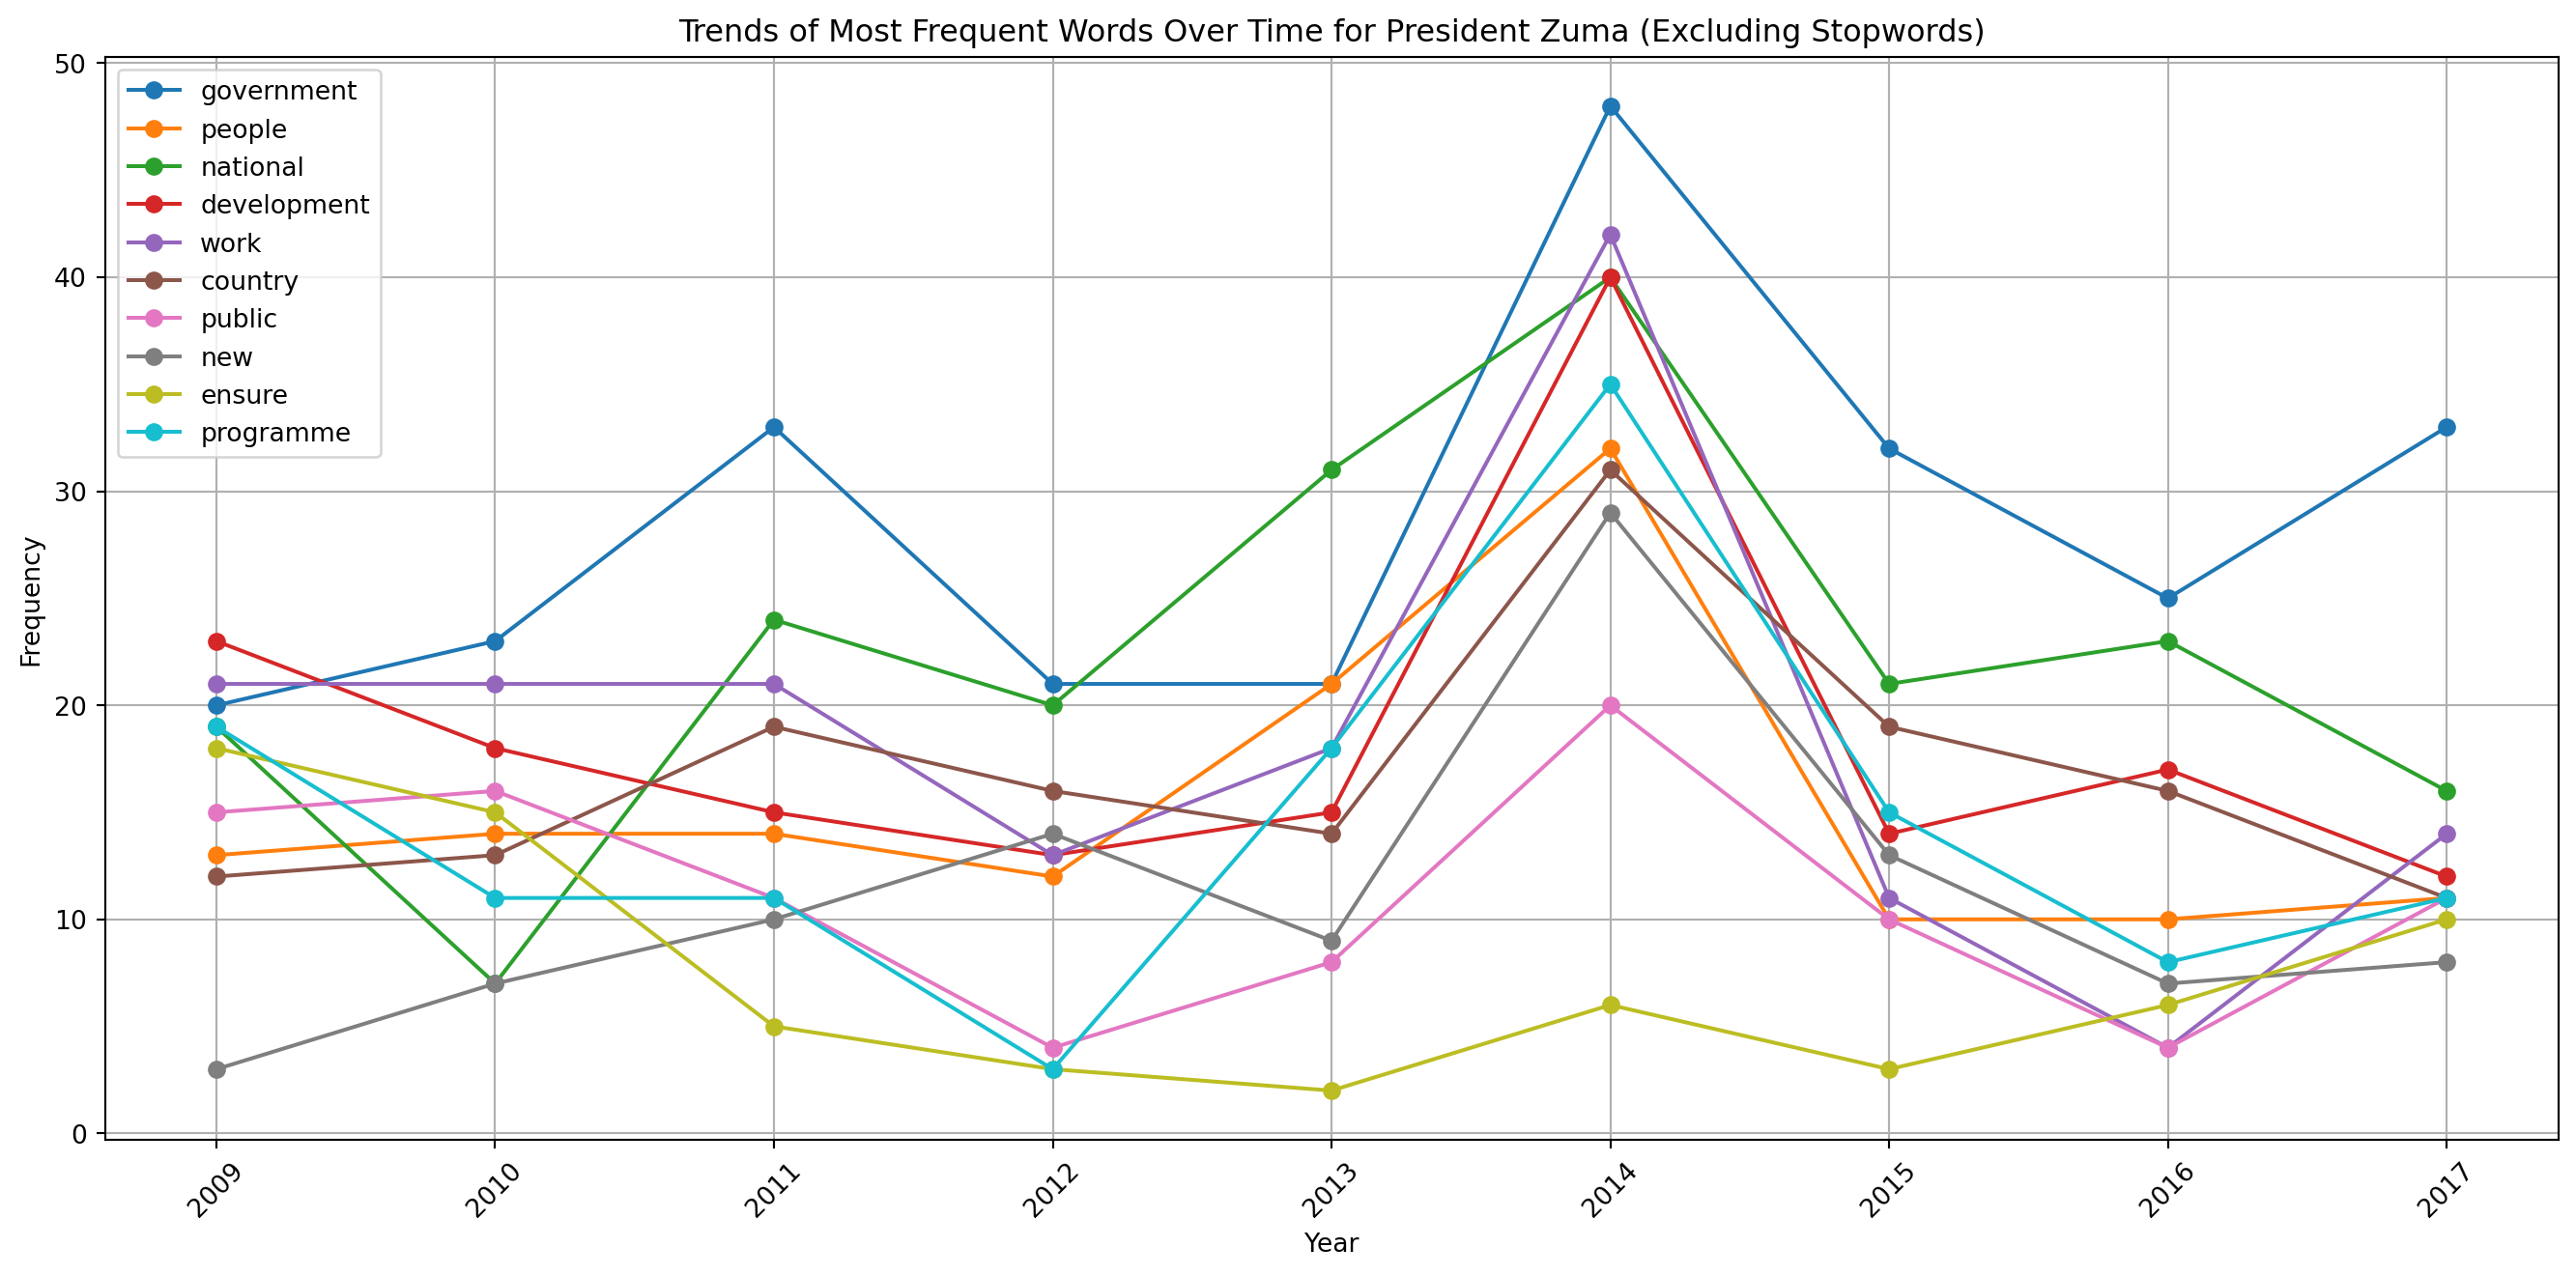

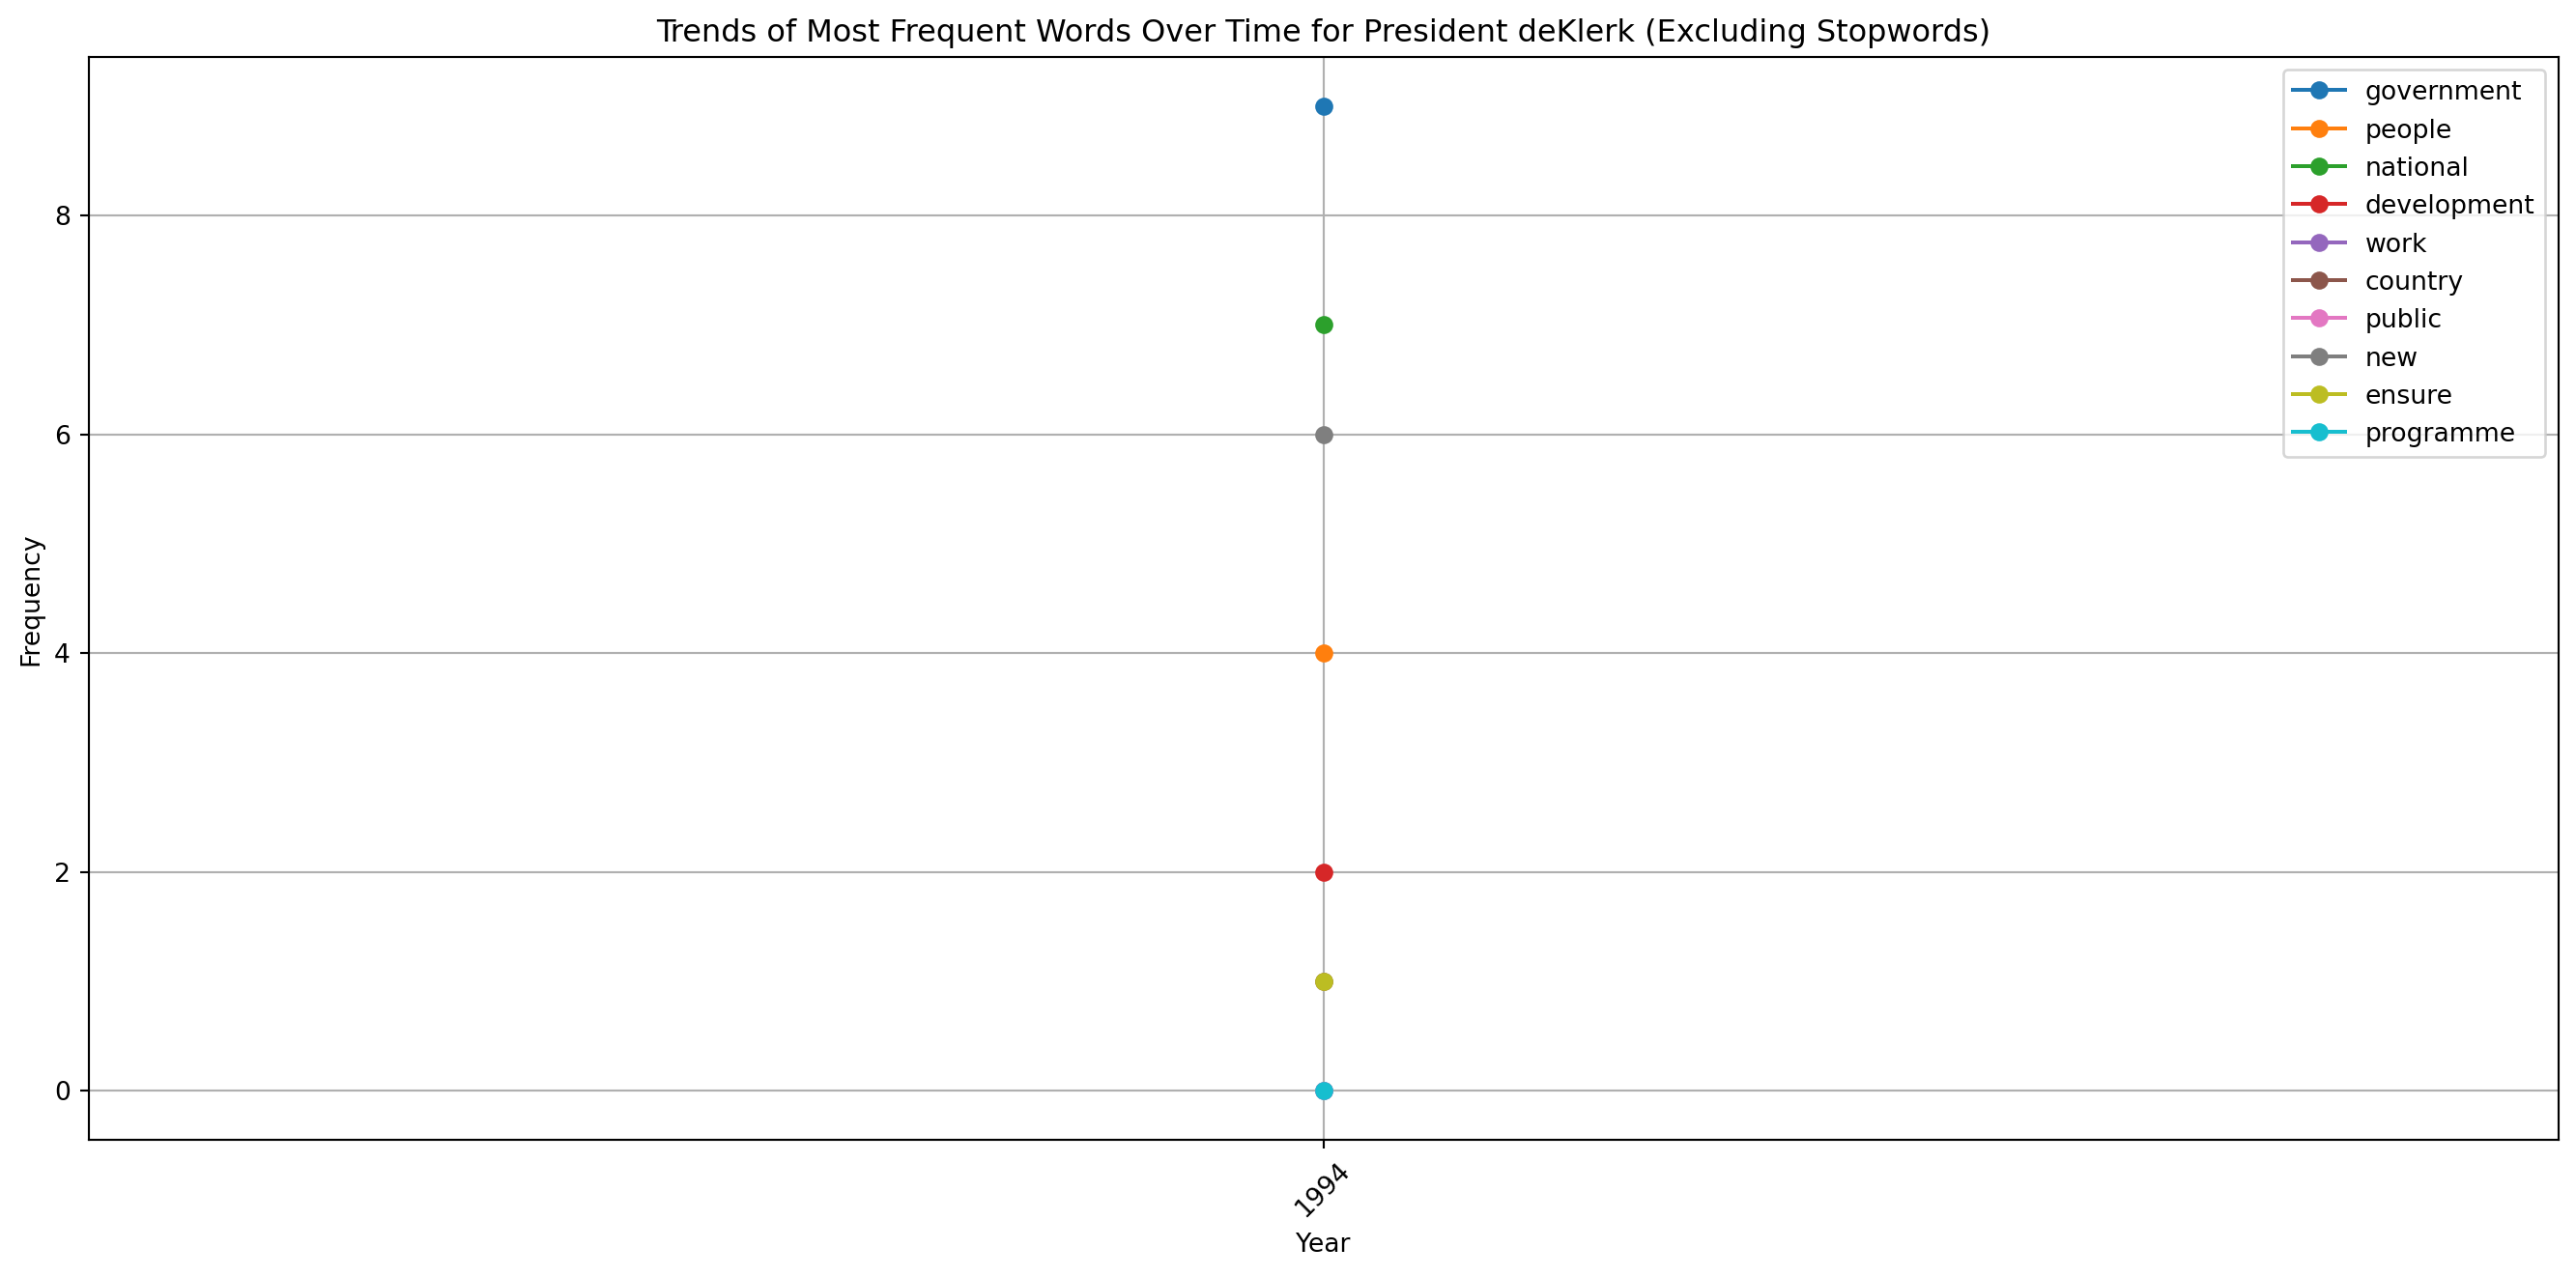

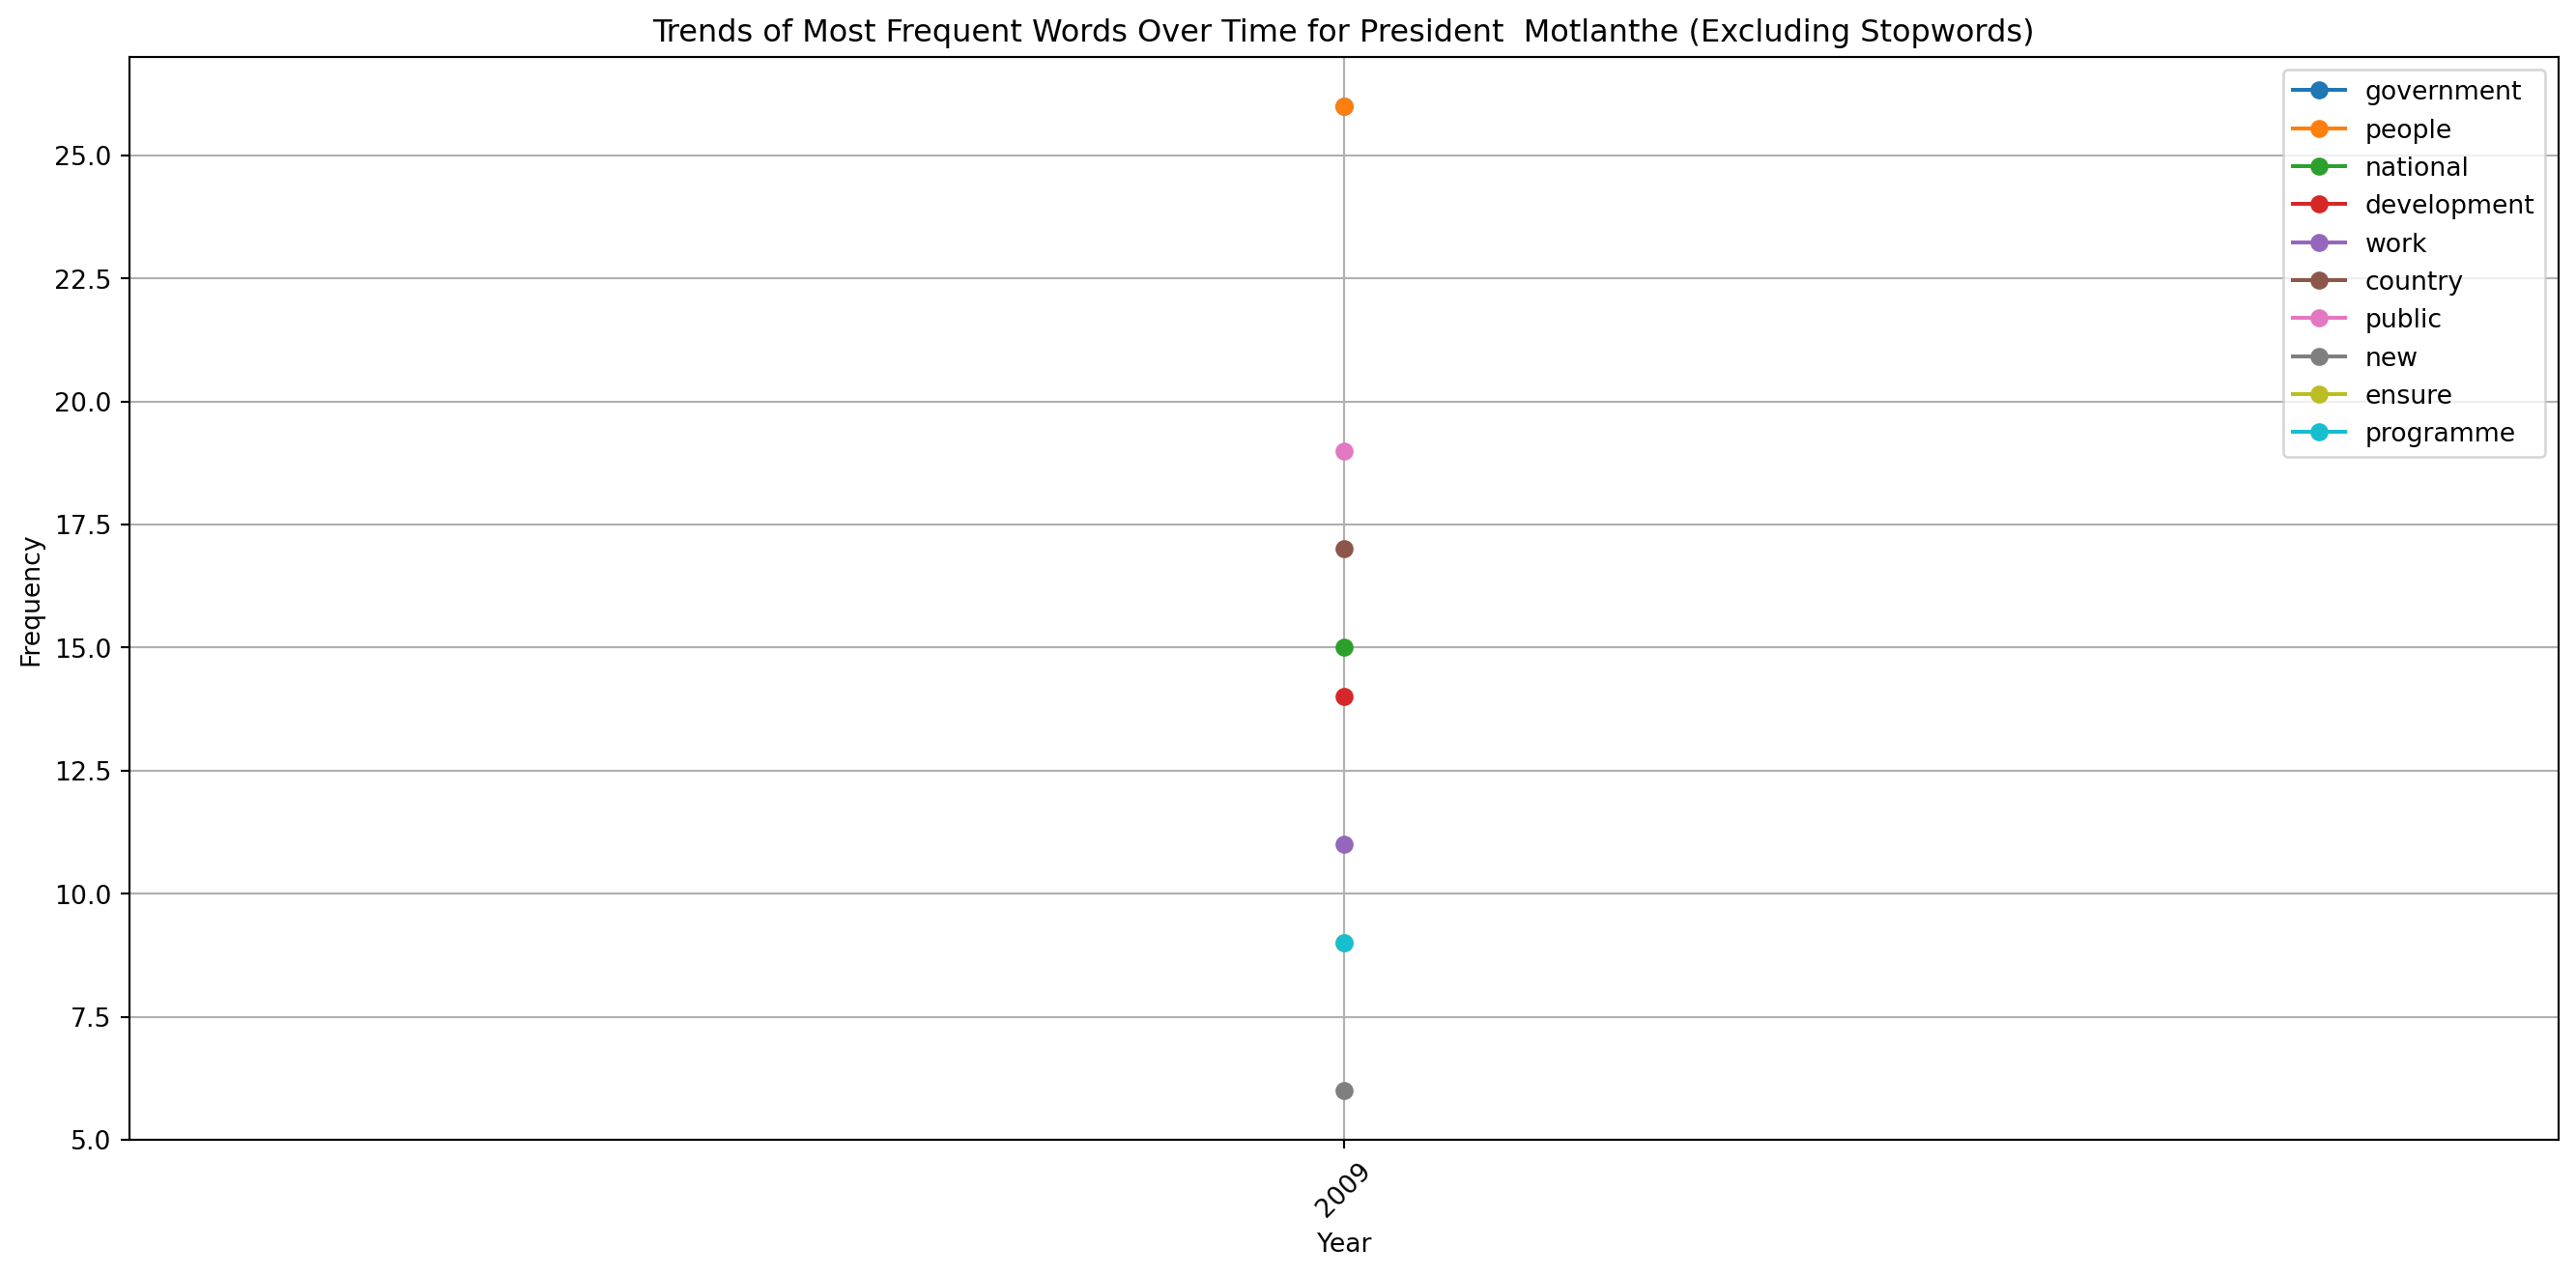

In [12]:
# Function to get yearly frequency of specific words for each president
def get_presidential_yearly_word_trends(speeches_df, words):
    presidents = speeches_df['president'].unique()
    presidential_word_trends = {president: {word: [] for word in words} for president in presidents}
    presidential_years = {president: sorted(speeches_df[speeches_df['president'] == president]['year'].unique()) for president in presidents}
    
    for president in presidents:
        for year in presidential_years[president]:
            year_speeches = speeches_df[(speeches_df['year'] == year) & (speeches_df['president'] == president)]['speech']
            word_counts = get_word_frequencies(year_speeches, ENGLISH_STOP_WORDS)
            for word in words:
                presidential_word_trends[president][word].append(word_counts[word])
    
    return presidential_years, presidential_word_trends

# Get the presidential yearly trends for the overall top words
presidential_years, presidential_word_trends = get_presidential_yearly_word_trends(sona_speeches_df, overall_top_words)

# Plotting the line graphs for the most frequent words for each president over time
for president in presidential_years:
    plt.figure(figsize=(14, 7))

    for word in overall_top_words:
        plt.plot(presidential_years[president], presidential_word_trends[president][word], label=word, marker='o')

    plt.title(f'Trends of Most Frequent Words Over Time for President {president} (Excluding Stopwords)')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.xticks(presidential_years[president], rotation=45)
    plt.tight_layout()
    plt.show()


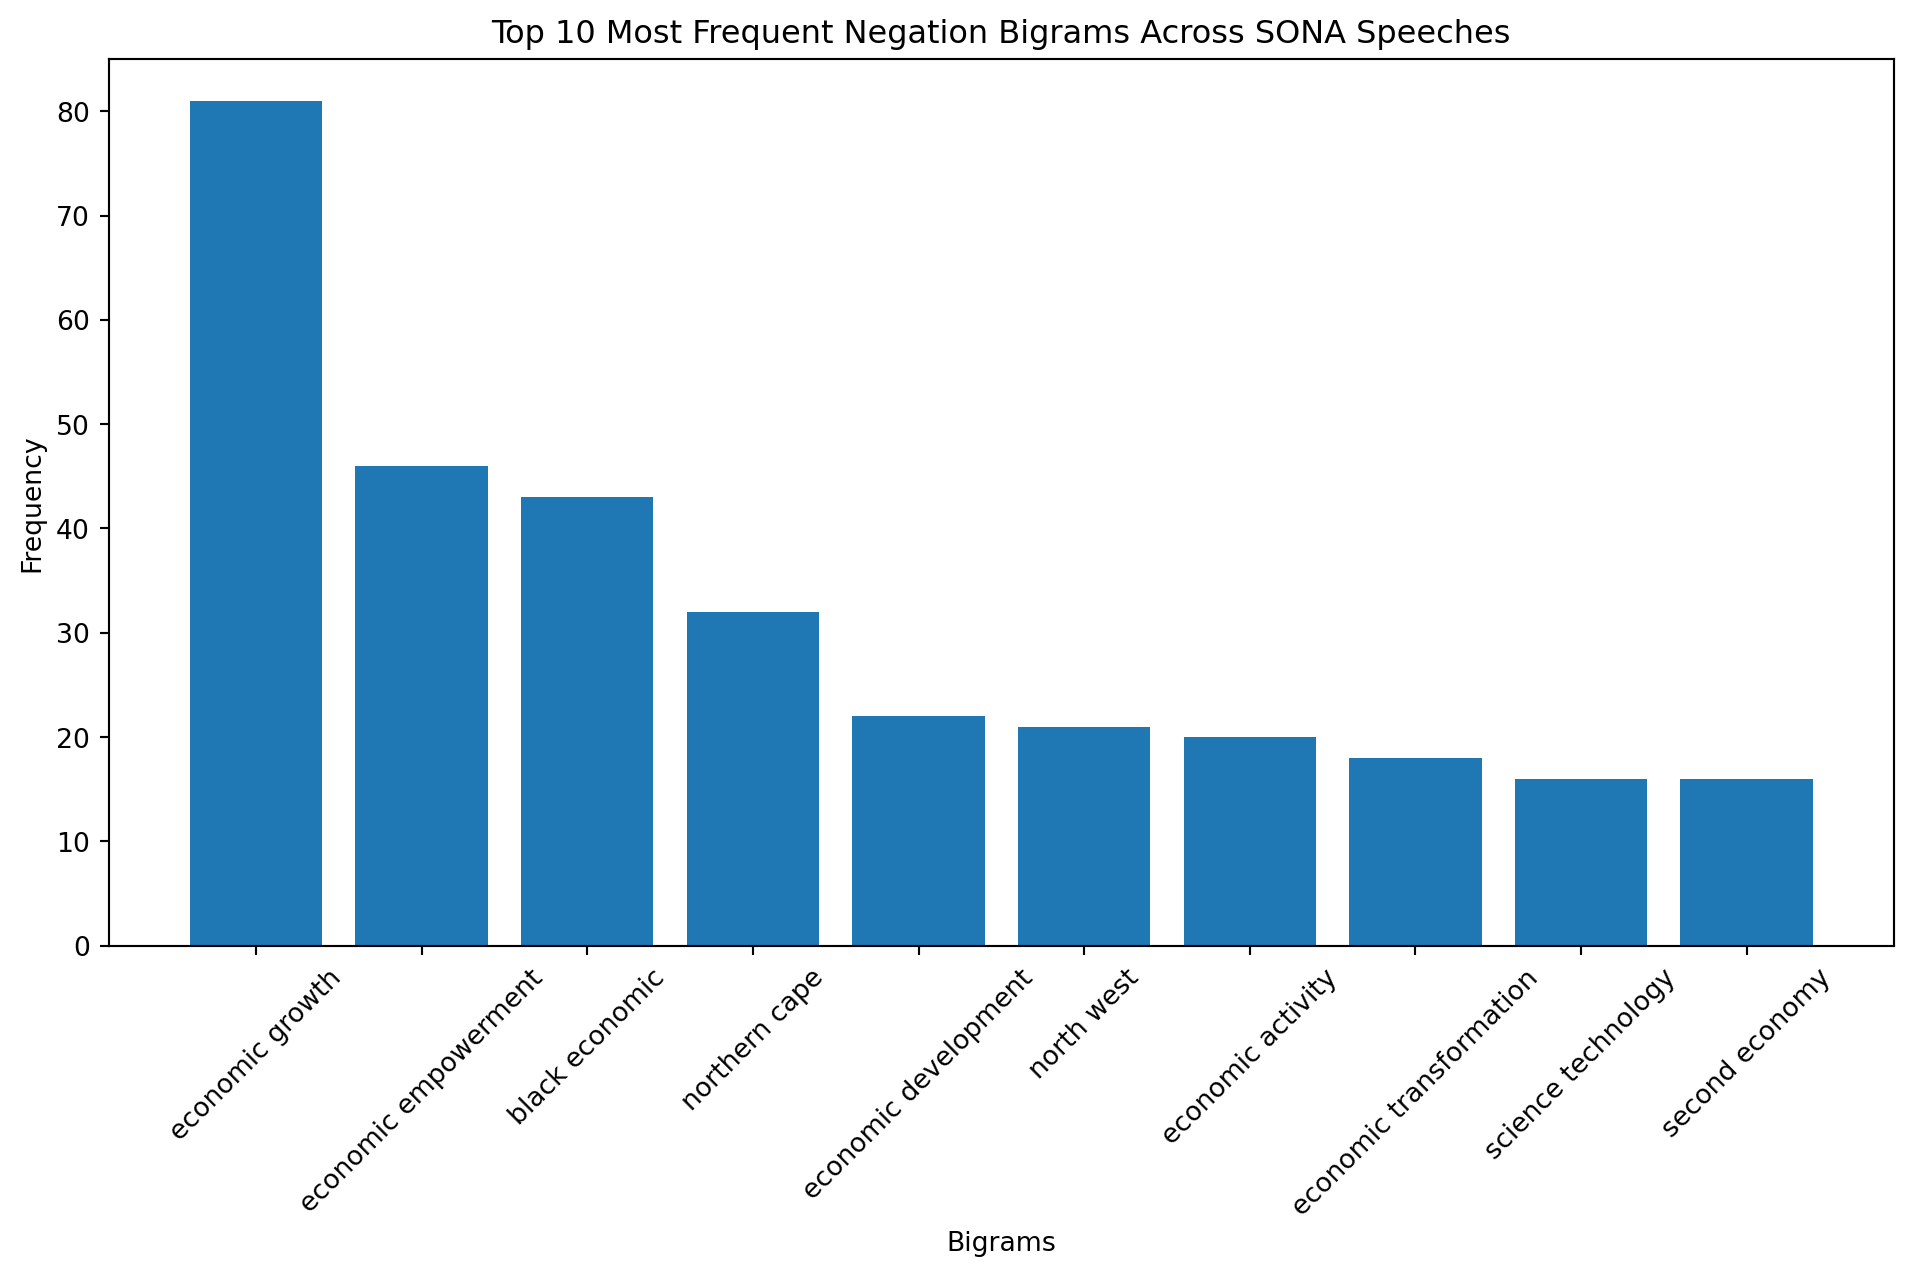

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain

# Define the list of negation words
negation_words = ['not', 'no', 'never', 'without', 'nor']

# Function to get top N frequent bigrams for the given speeches
def get_top_negation_bigrams(speeches, n, negation_words):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    X = vectorizer.fit_transform(speeches)
    feature_names = vectorizer.get_feature_names_out()
    bigram_frequencies = zip(feature_names, X.toarray().sum(axis=0))
    # TODO filter actual negation words
    # Filter bigrams to only keep those with negation words
    negation_bigrams = [(bigram, freq) for bigram, freq in bigram_frequencies if any(neg_word in bigram for neg_word in negation_words)]
    negation_bigrams = sorted(negation_bigrams, key=lambda x: x[1], reverse=True)[:n]
    
    return negation_bigrams

# Get the top 10 most frequent negation bigrams across all speeches
top_10_negation_bigrams = get_top_negation_bigrams(sona_speeches_df['speech'], 10, negation_words)

# Plotting the bar graph for the top 10 most frequent negation bigrams across speeches
plt.figure(figsize=(12, 6))
plt.bar([bigram for bigram, count in top_10_negation_bigrams], [count for bigram, count in top_10_negation_bigrams])
plt.title('Top 10 Most Frequent Negation Bigrams Across SONA Speeches')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


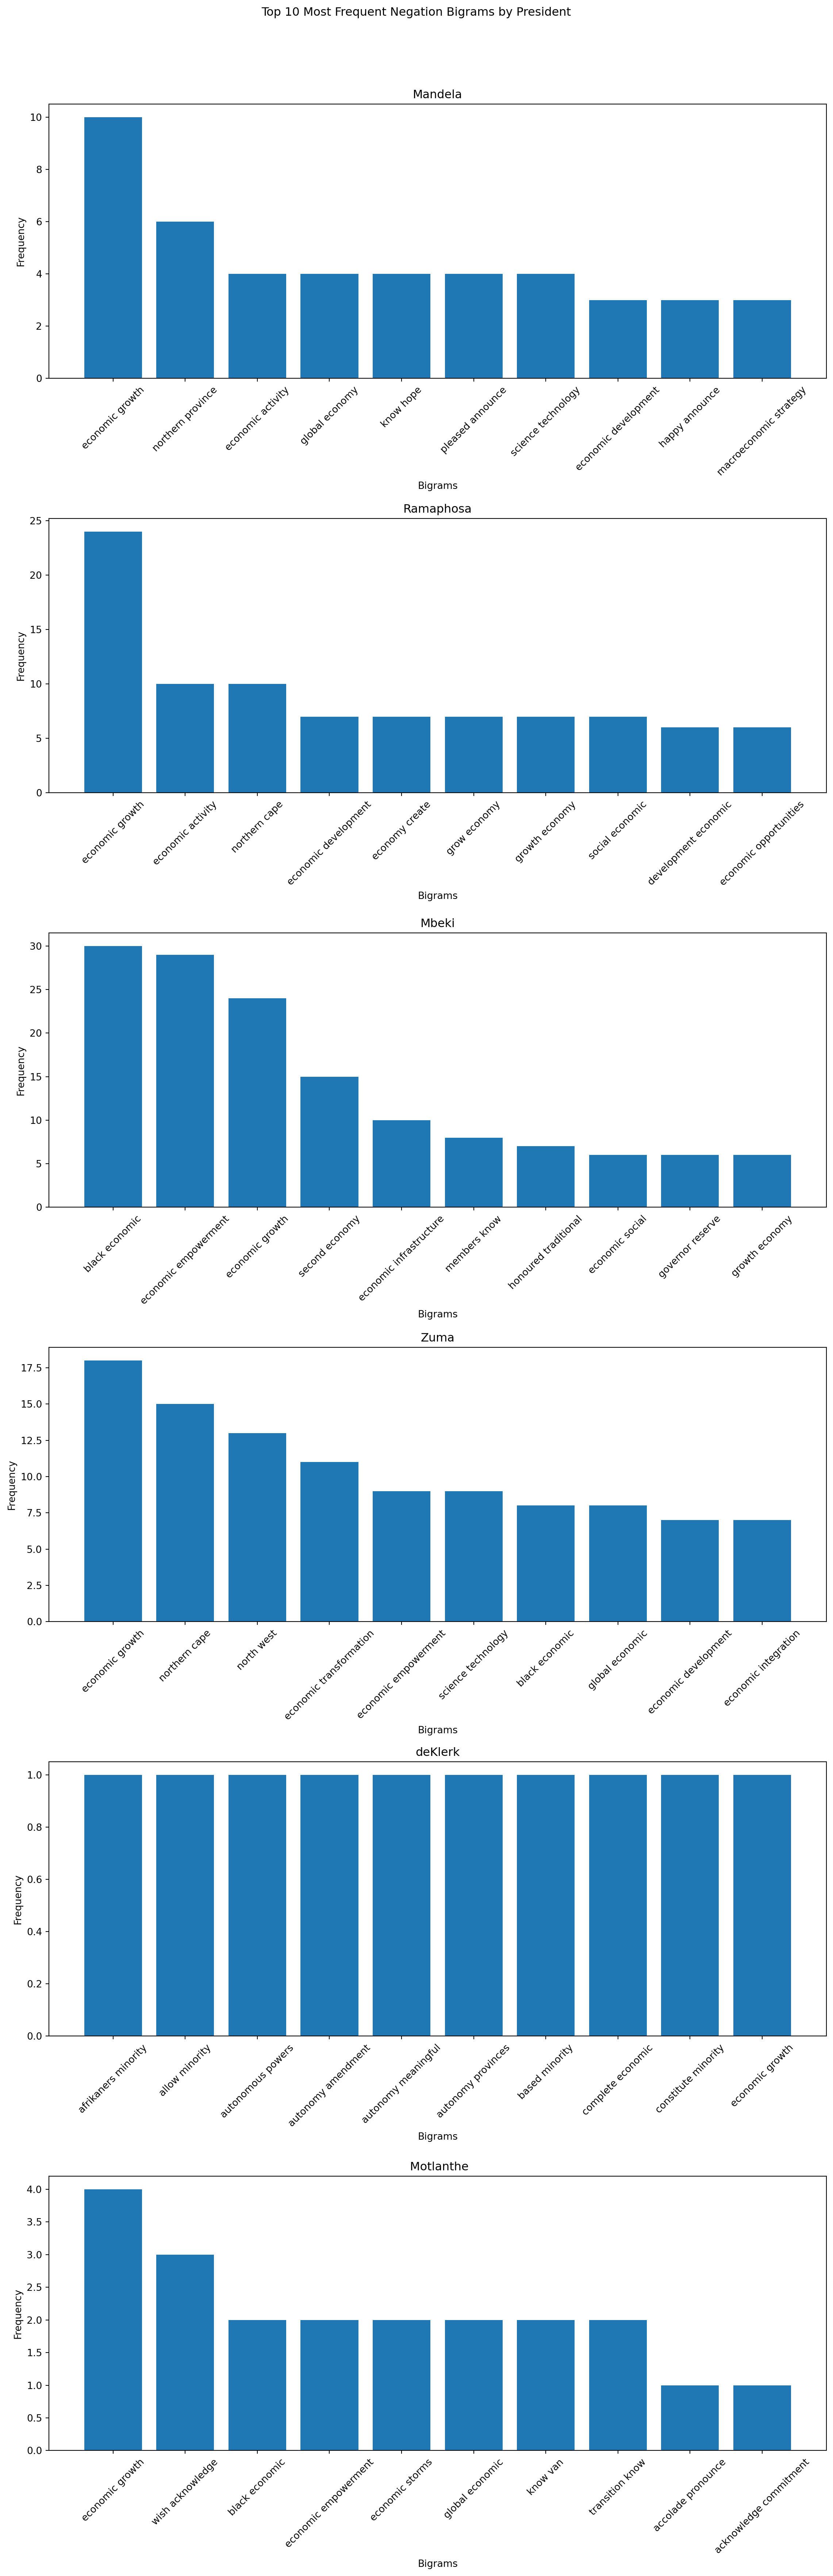

In [14]:
# Function to get top N frequent negation bigrams for each president
def get_top_negation_bigrams_by_president(speeches_df, n, negation_words):
    presidents = speeches_df['president'].unique()
    top_negation_bigrams_by_president = {}
    for president in presidents:
        president_speeches = speeches_df[speeches_df['president'] == president]['speech']
        negation_bigrams = get_top_negation_bigrams(president_speeches, n, negation_words)
        top_negation_bigrams_by_president[president] = negation_bigrams
    return top_negation_bigrams_by_president

# Get the top 10 most frequent negation bigrams for each president
top_10_negation_bigrams_by_president = get_top_negation_bigrams_by_president(sona_speeches_df, 10, negation_words)

# Plotting the bar graph for the top 10 most frequent negation bigrams faceted by president
fig, axes = plt.subplots(nrows=len(top_10_negation_bigrams_by_president), ncols=1, figsize=(12, 6 * len(top_10_negation_bigrams_by_president)))
fig.suptitle('Top 10 Most Frequent Negation Bigrams by President', y=1.02)

for i, (president, negation_bigrams) in enumerate(top_10_negation_bigrams_by_president.items()):
    axes[i].bar([bigram for bigram, count in negation_bigrams], [count for bigram, count in negation_bigrams])
    axes[i].set_title(president)
    axes[i].set_xlabel('Bigrams')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


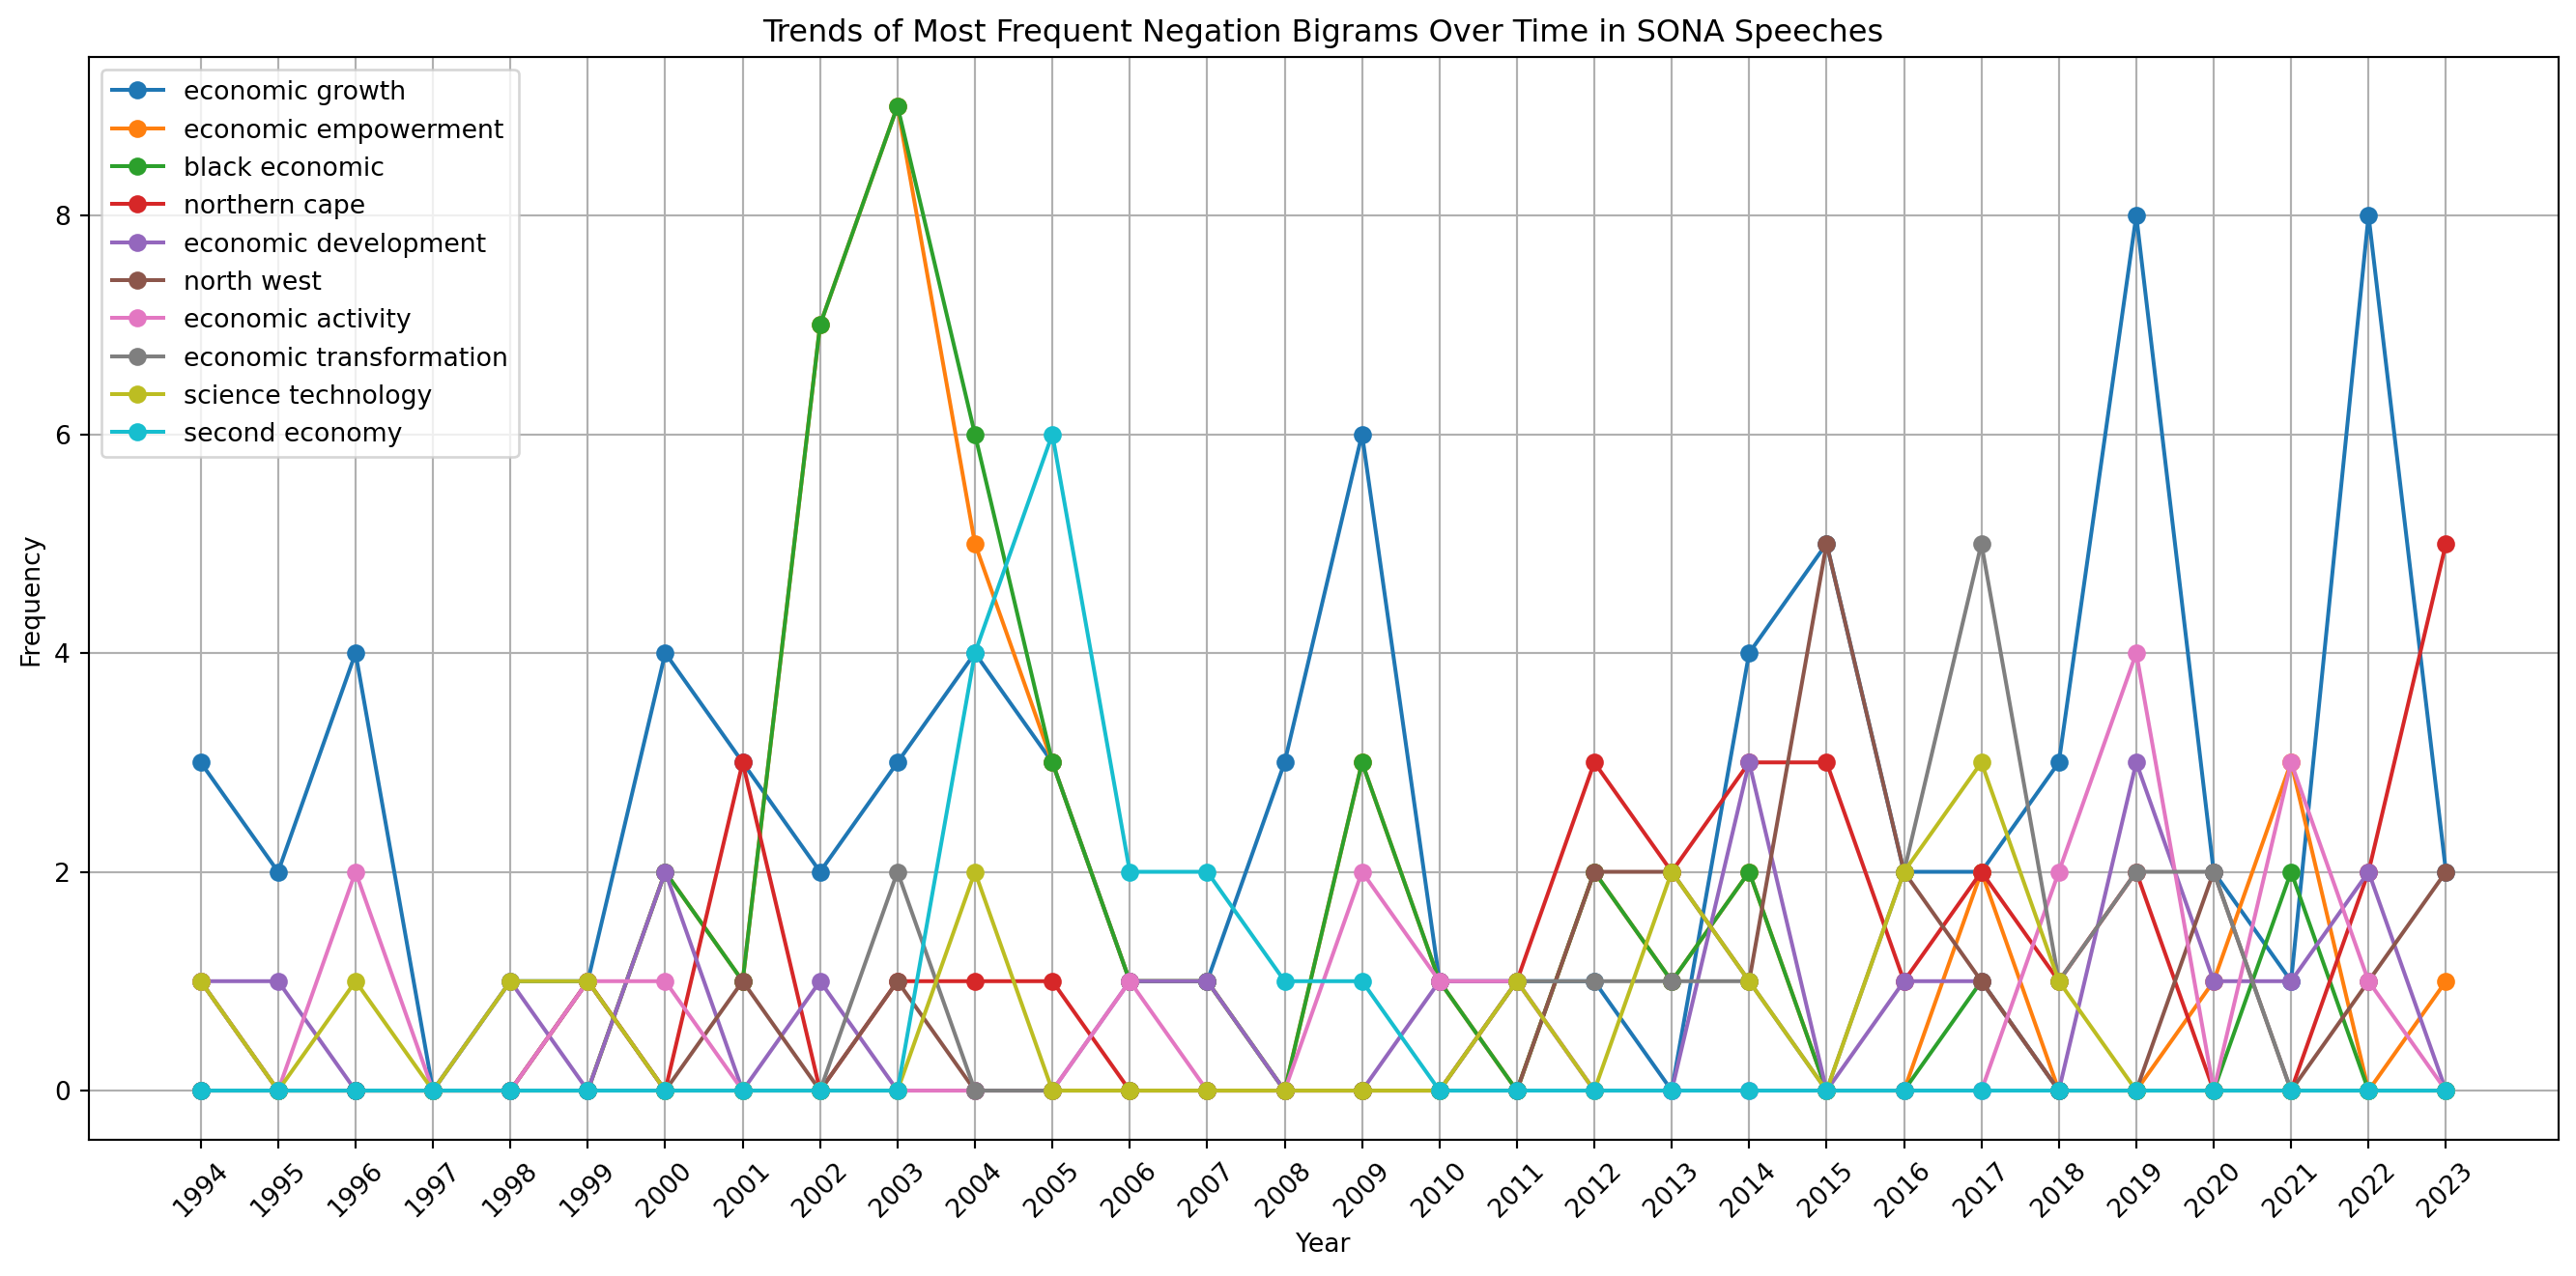

In [15]:
# We will first identify the overall top negation bigrams to track over time.
overall_top_negation_bigrams = [bigram for bigram, count in top_10_negation_bigrams]

# Function to get yearly frequency of specific bigrams
def get_yearly_bigram_trends(speeches_df, bigrams):
    yearly_bigram_trends = {bigram: [] for bigram in bigrams}
    years = sorted(speeches_df['year'].unique())
    
    for year in years:
        year_speeches = speeches_df[speeches_df['year'] == year]['speech']
        negation_bigrams = get_top_negation_bigrams(year_speeches, None, negation_words)  # None for n to get all
        negation_bigrams_dict = dict(negation_bigrams)
        
        for bigram in bigrams:
            yearly_bigram_trends[bigram].append(negation_bigrams_dict.get(bigram, 0))
    
    return years, yearly_bigram_trends

# Get the yearly trends for the overall top negation bigrams
years, yearly_negation_bigram_trends = get_yearly_bigram_trends(sona_speeches_df, overall_top_negation_bigrams)

# Plotting the line graph for how the most frequent negation bigrams trend over time across speeches
plt.figure(figsize=(14, 7))

for bigram in overall_top_negation_bigrams:
    plt.plot(years, yearly_negation_bigram_trends[bigram], label=bigram, marker='o')

plt.title('Trends of Most Frequent Negation Bigrams Over Time in SONA Speeches')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


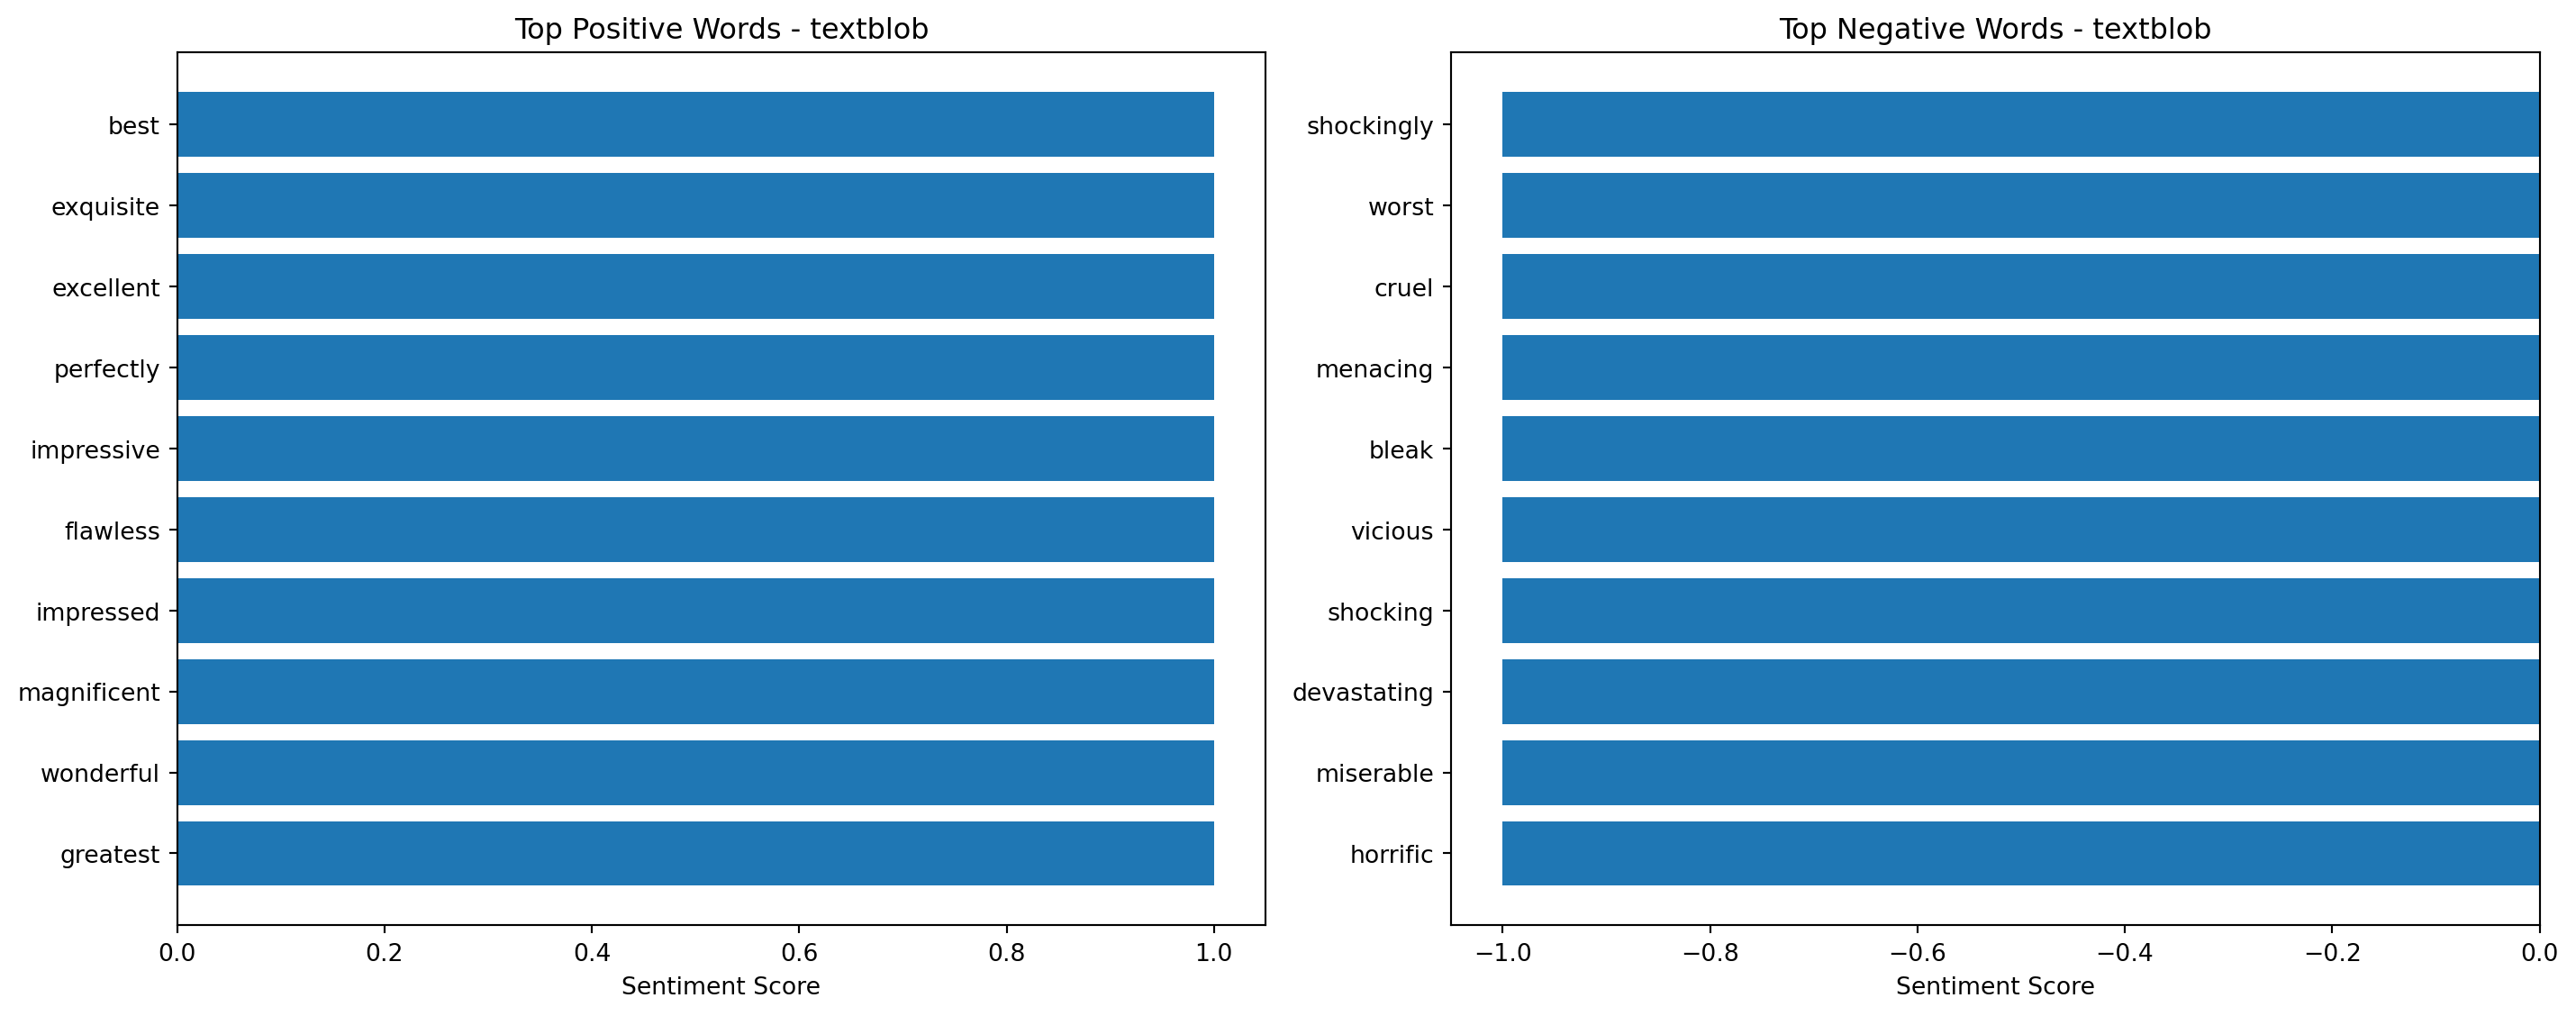

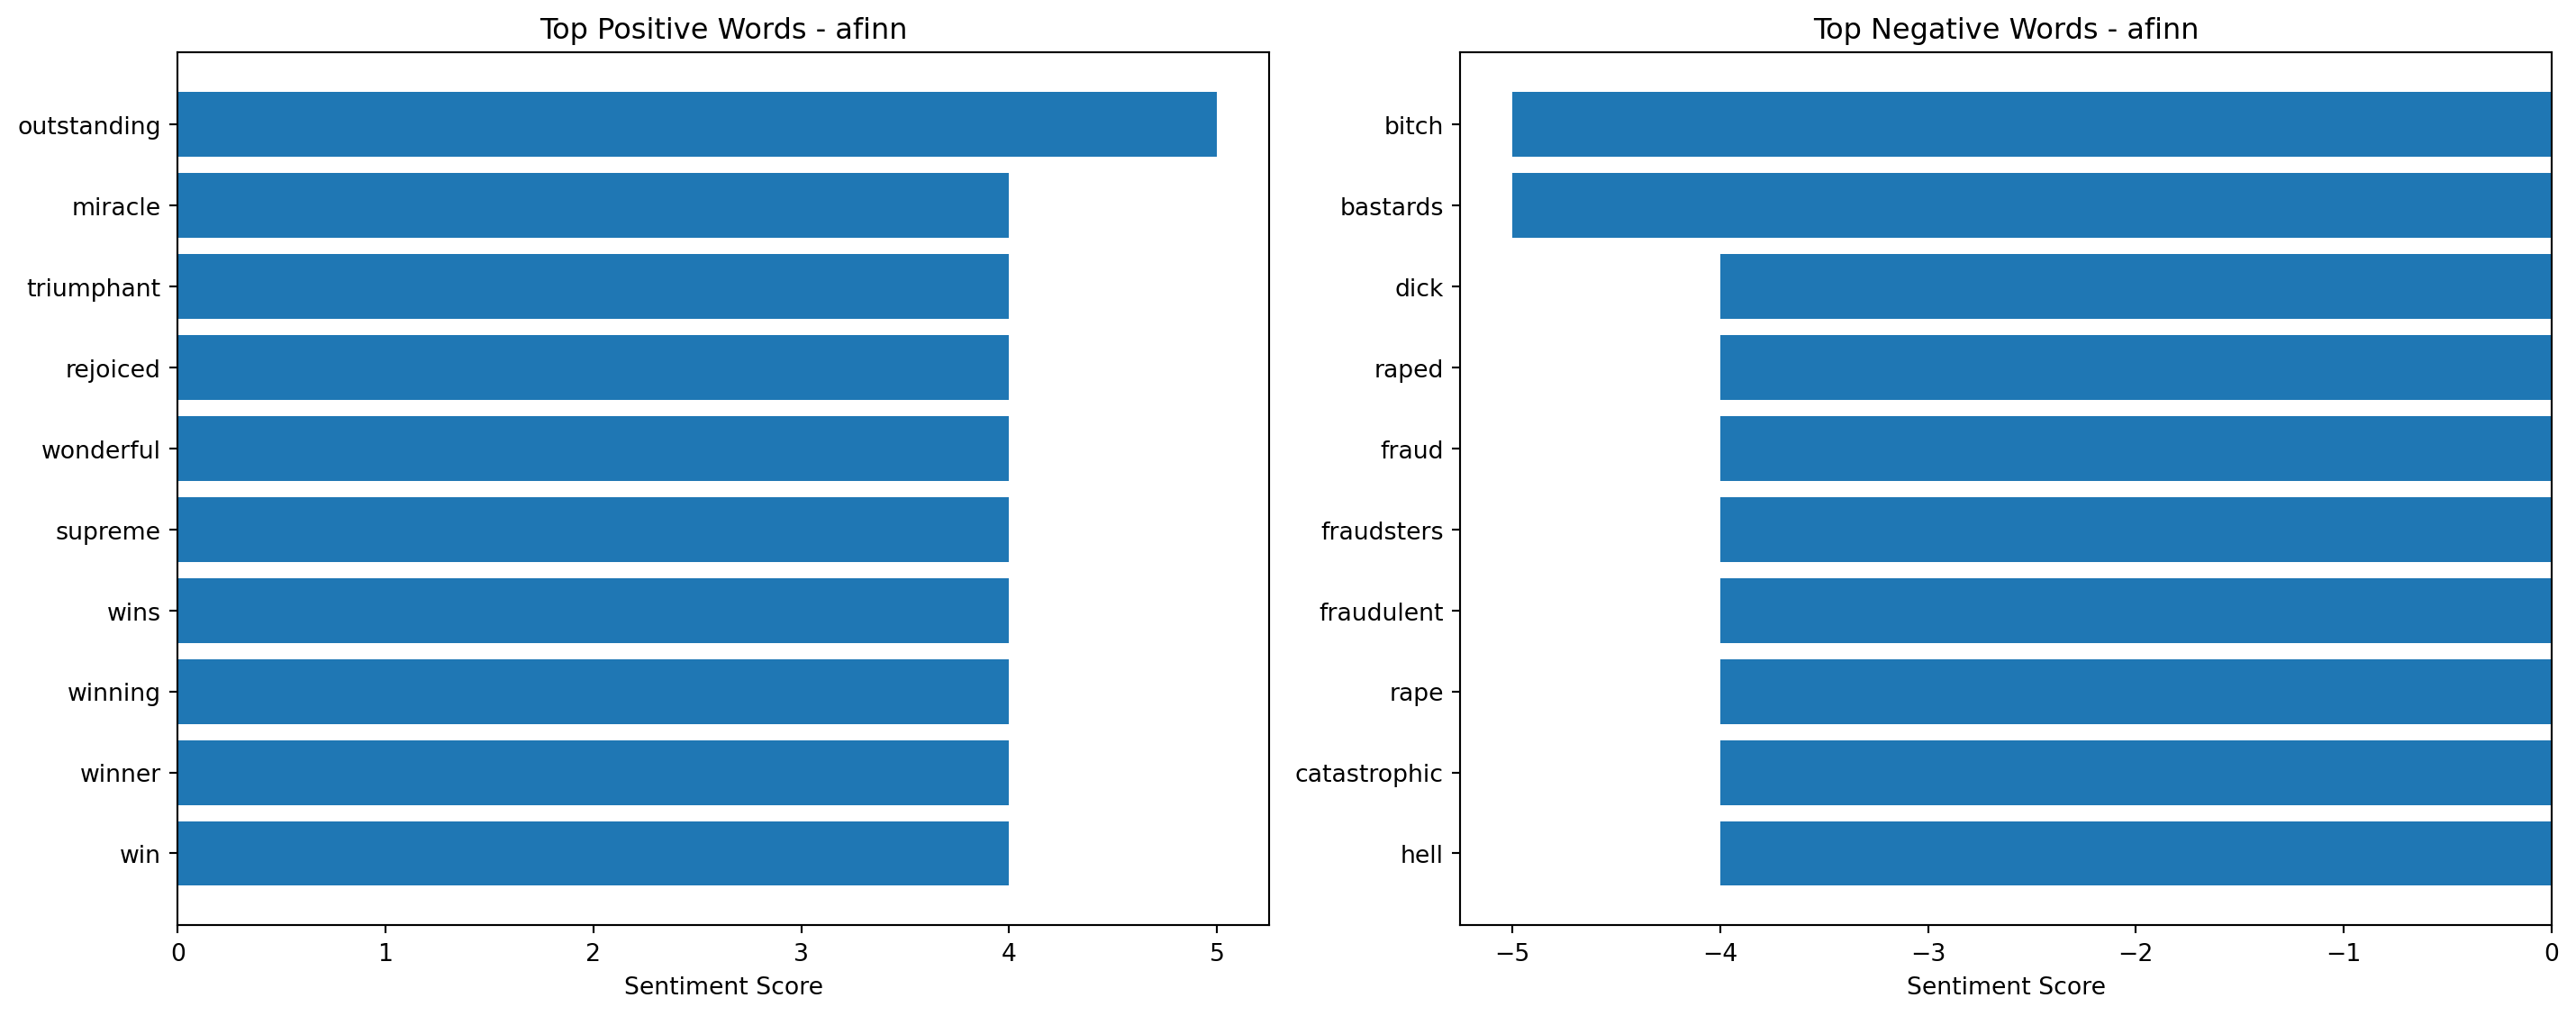

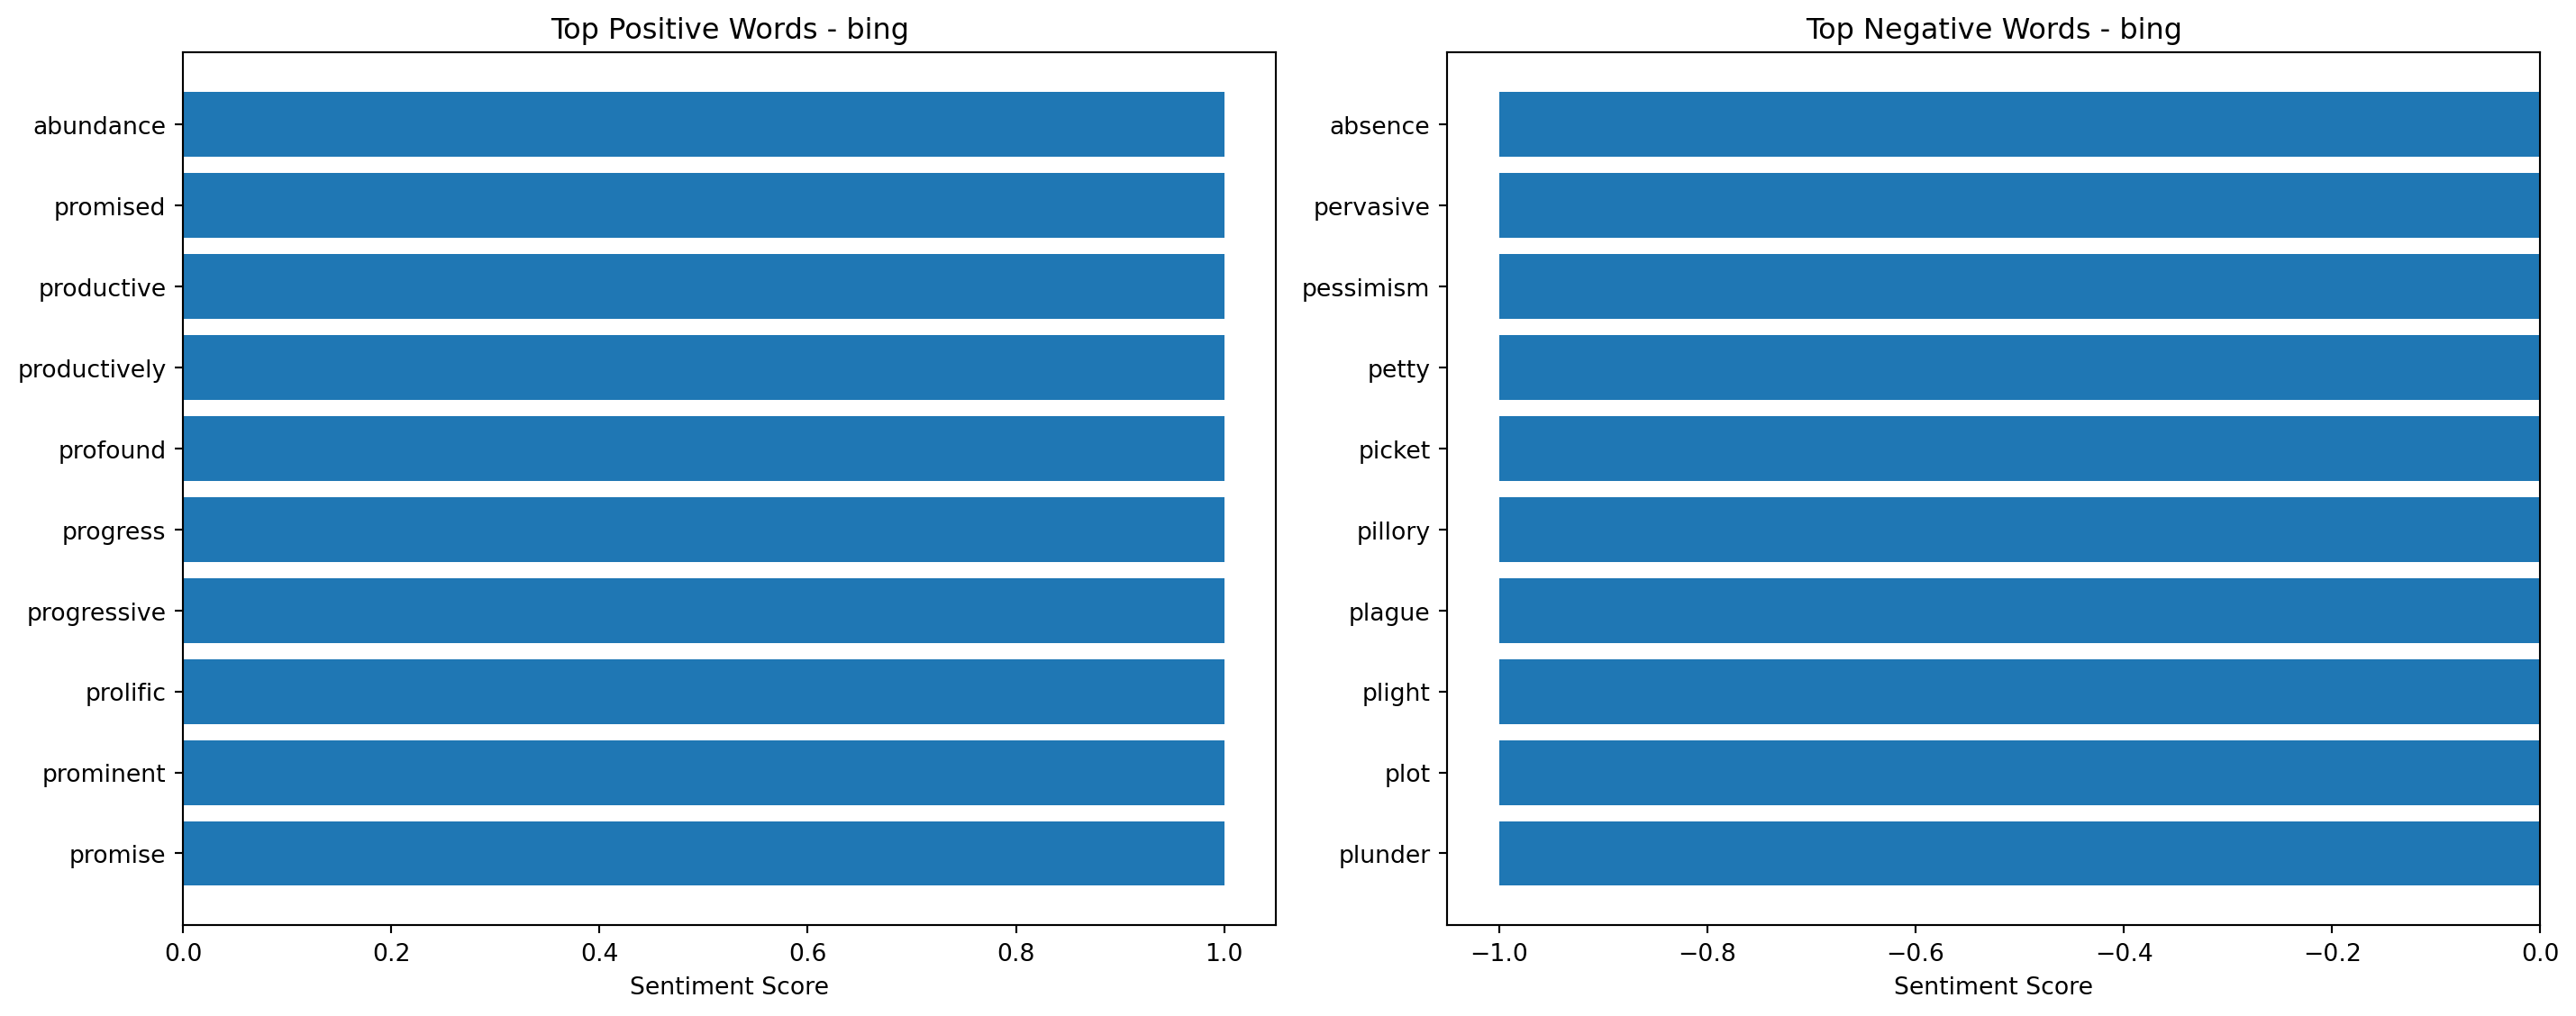

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from afinn import Afinn
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

# Make sure to download the necessary NLTK corpora if you haven't already
import nltk
# nltk.download('opinion_lexicon')
# nltk.download('punkt')

# Initialize Afinn and prepare Bing lexicon
afinn = Afinn()
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to calculate sentiment scores using Afinn
def afinn_sentiment(text):
    return afinn.score(text)

# Function to calculate sentiment scores using Bing lexicon
def bing_sentiment(word):
    if word in positive_words:
        return 1  # Positive sentiment
    elif word in negative_words:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Function to analyze the sentiment of each word in the speech
def analyze_sentiment(speech):
    # Tokenize words
    words = word_tokenize(speech)
    
    # TextBlob
    tb_sentiments = [TextBlob(word).sentiment.polarity for word in words]
    
    # Afinn
    afinn_sentiments = [afinn_sentiment(word) for word in words]
    
    # Bing
    bing_sentiments = [bing_sentiment(word) for word in words]
    
    # Aggregate results
    sentiment_data = pd.DataFrame({
        'word': words,
        'textblob': tb_sentiments,
        'afinn': afinn_sentiments,
        'bing': bing_sentiments
    })
    
    return sentiment_data

# Apply the sentiment analysis
all_sentiments = pd.concat([analyze_sentiment(speech) for speech in sona_speeches_df['speech']])

# Group by word and calculate mean sentiment
aggregated_sentiments = all_sentiments.groupby('word').agg('mean').reset_index()

# Function to plot bar graphs for the words that contribute most to sentiment
def plot_sentiment_words(sentiment_df, lexicon_name):
    top_positive = sentiment_df[sentiment_df[lexicon_name] > 0].sort_values(by=lexicon_name, ascending=False).head(10)
    top_negative = sentiment_df[sentiment_df[lexicon_name] < 0].sort_values(by=lexicon_name).head(10)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    axes[0].barh(top_positive['word'], top_positive[lexicon_name])
    axes[0].set_title('Top Positive Words - ' + lexicon_name)
    axes[0].invert_yaxis()  # labels read top-to-bottom
    axes[0].set_xlabel('Sentiment Score')

    axes[1].barh(top_negative['word'], top_negative[lexicon_name])
    axes[1].set_title('Top Negative Words - ' + lexicon_name)
    axes[1].invert_yaxis()  # labels read top-to-bottom
    axes[1].set_xlabel('Sentiment Score')

    plt.tight_layout()
    plt.show()

# Plot for each lexicon
plot_sentiment_words(aggregated_sentiments, 'textblob')
plot_sentiment_words(aggregated_sentiments, 'afinn')
plot_sentiment_words(aggregated_sentiments, 'bing')


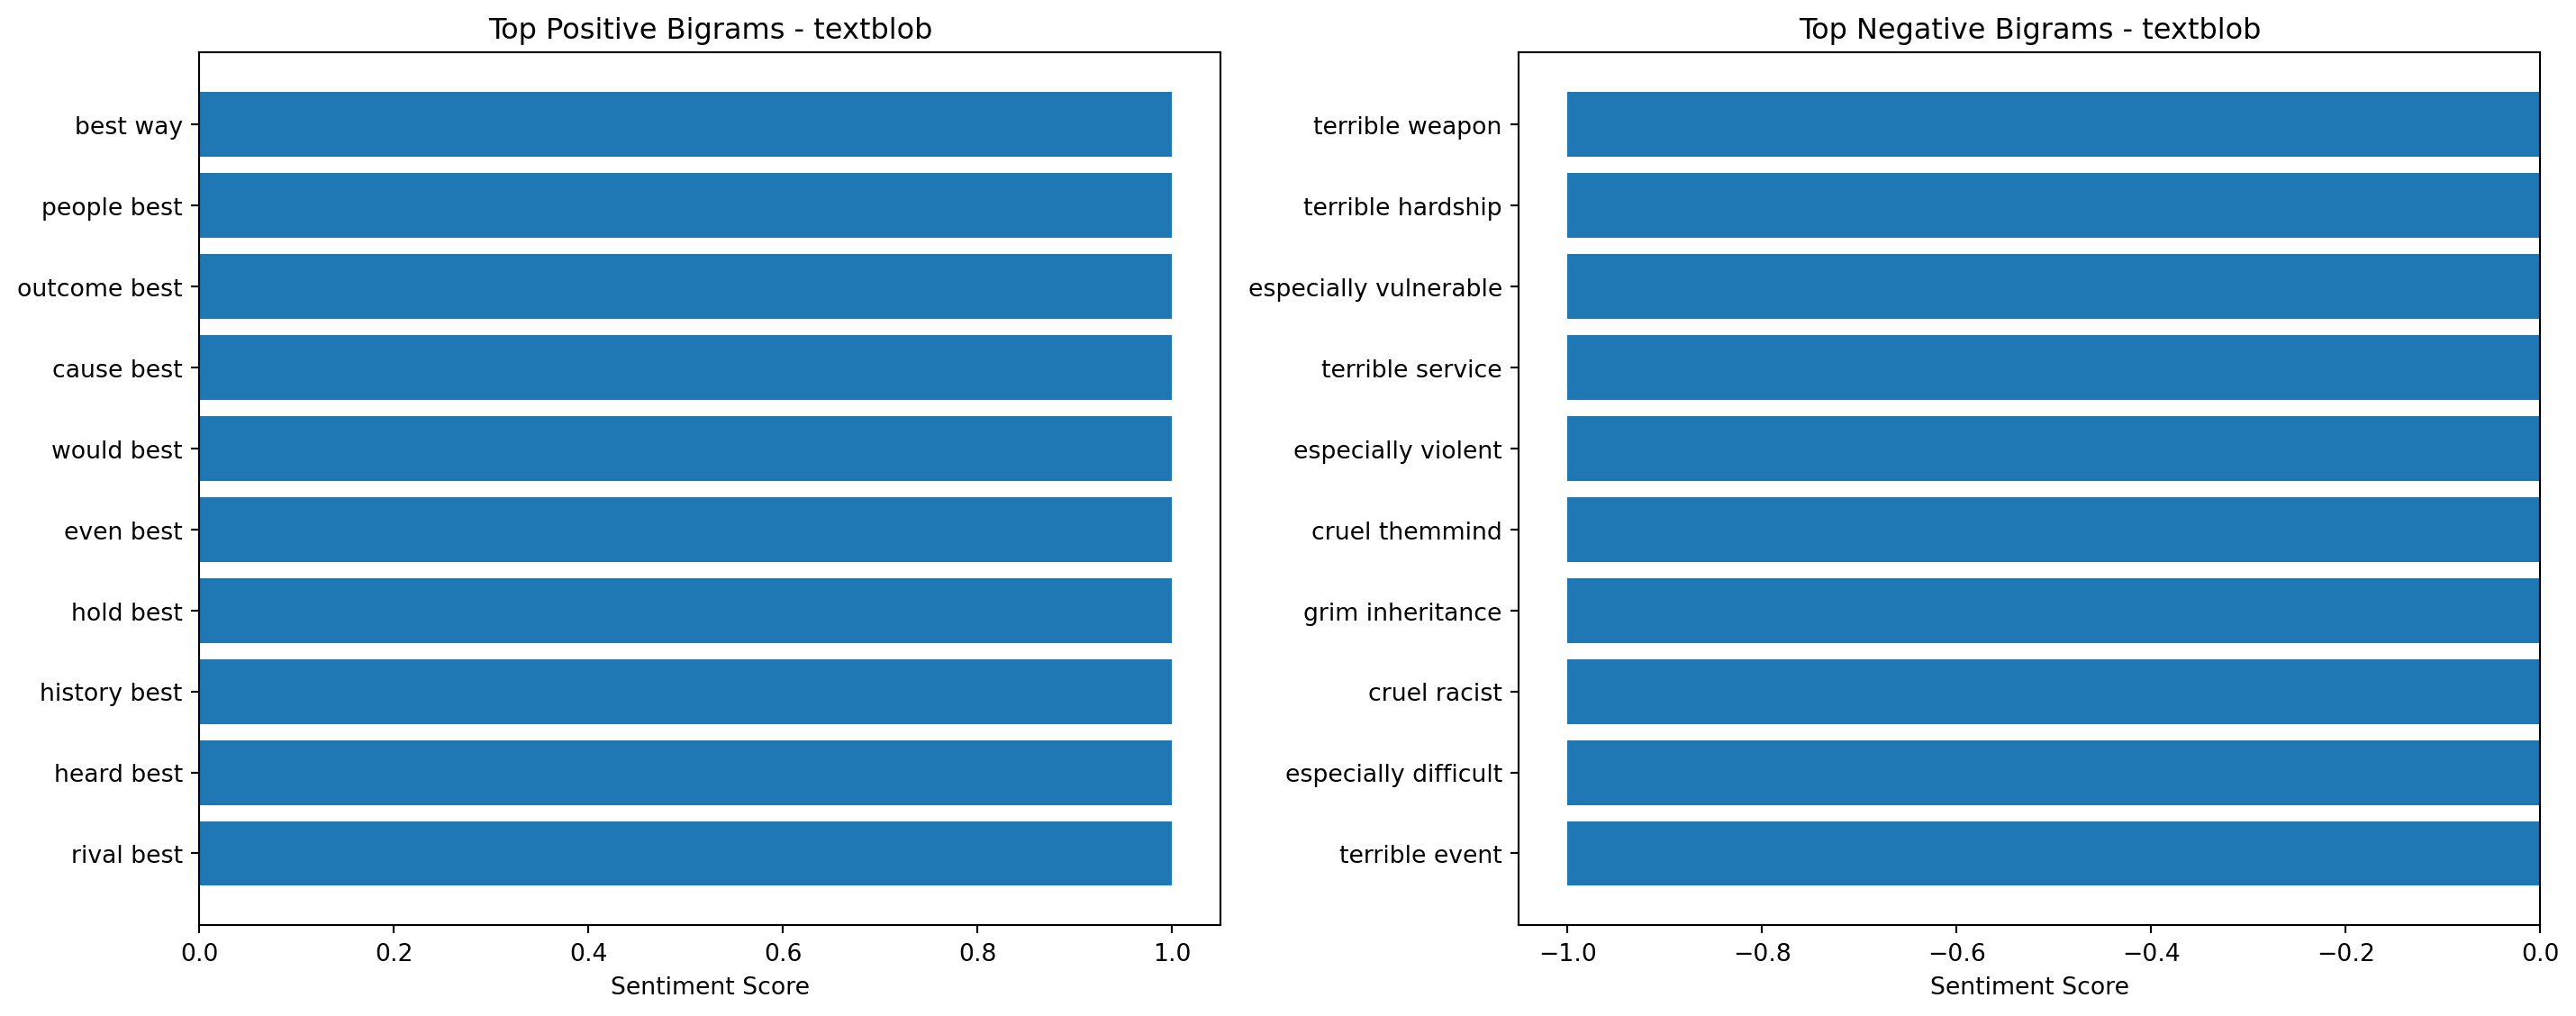

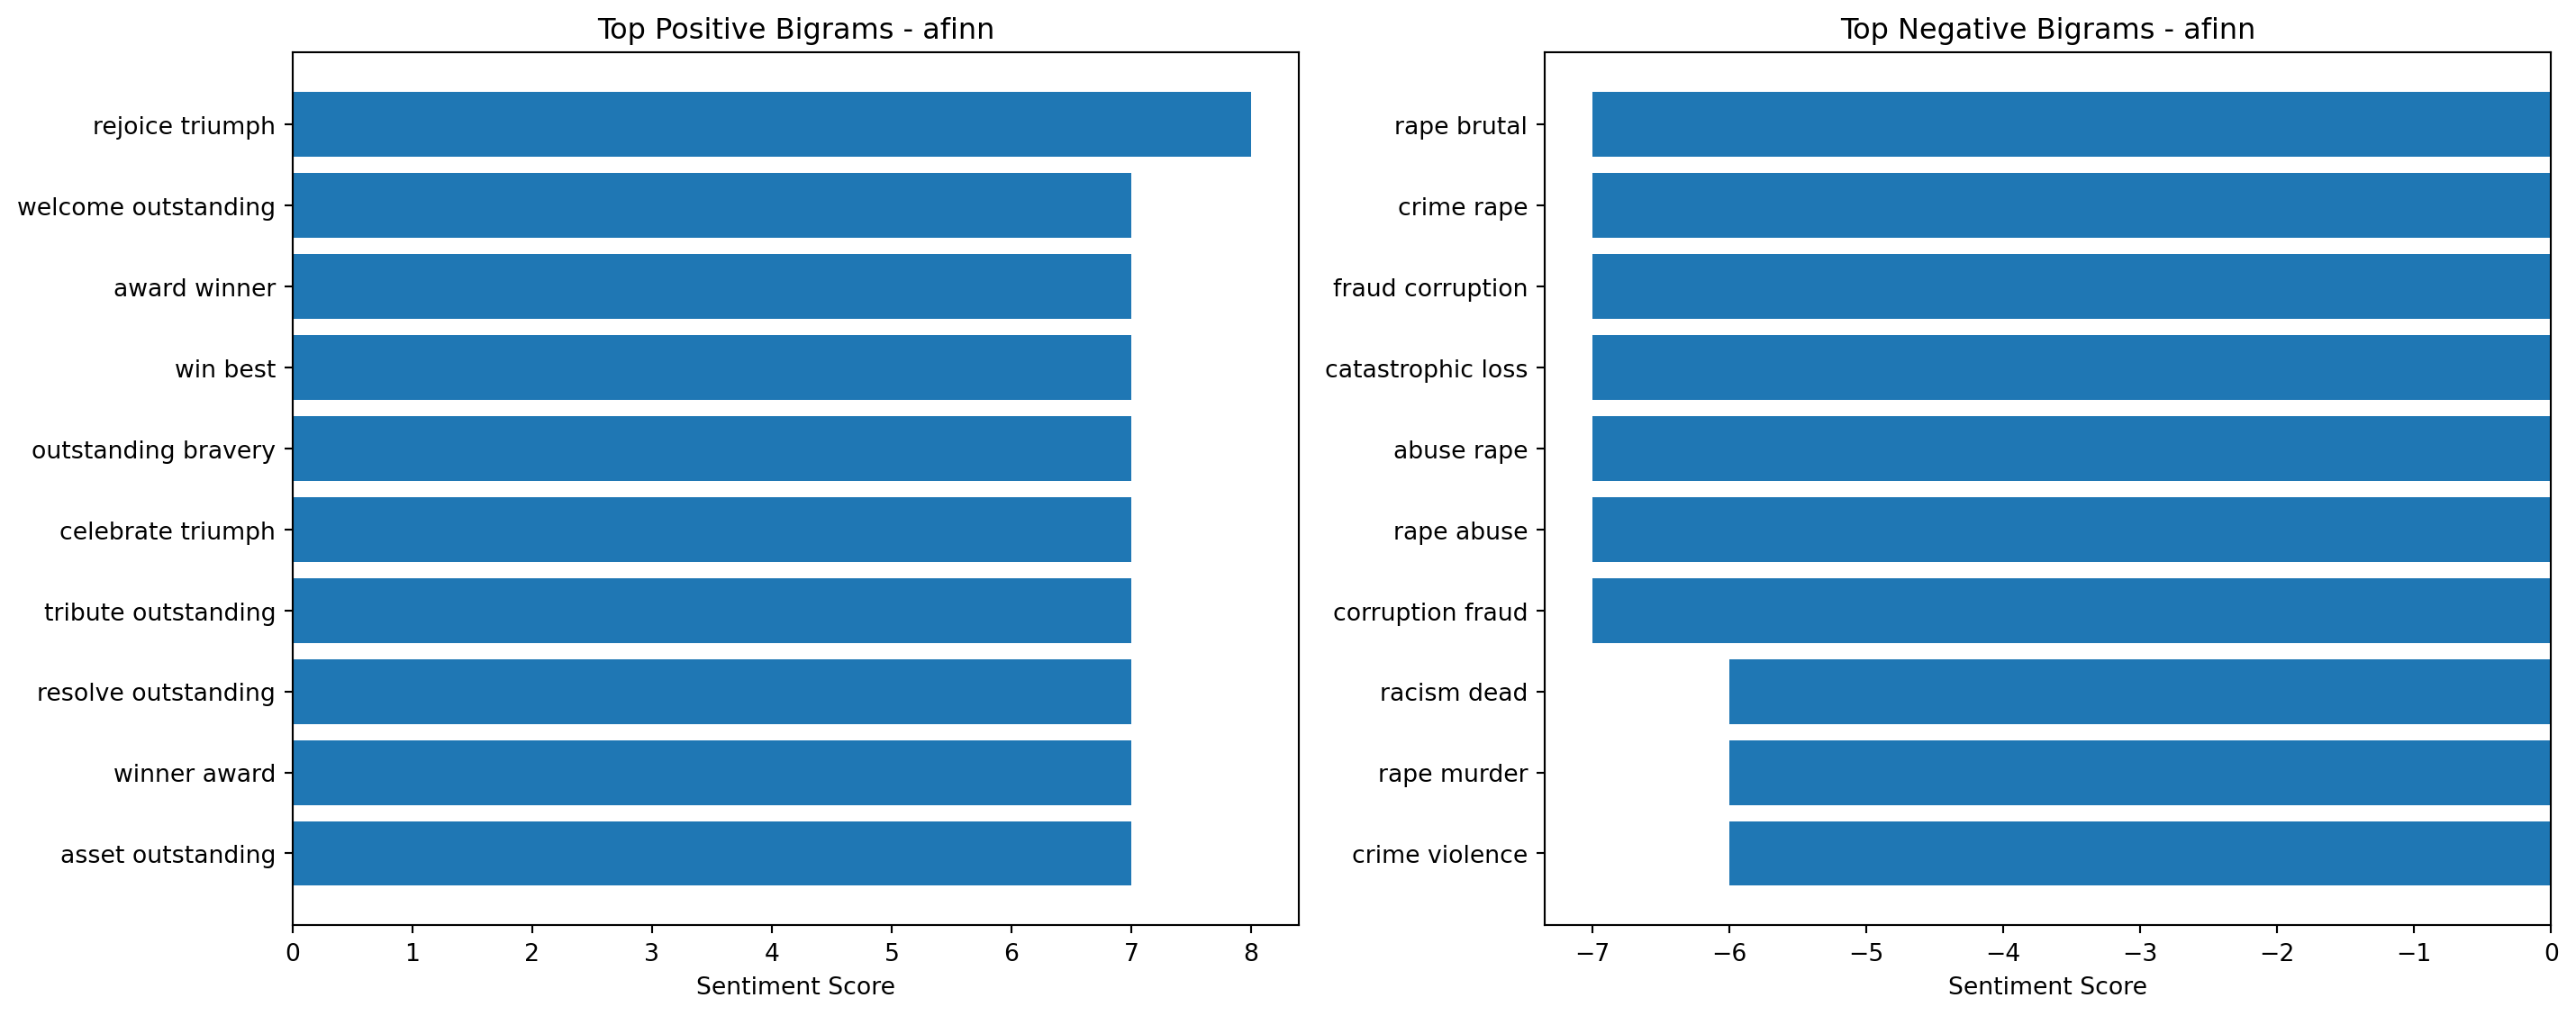

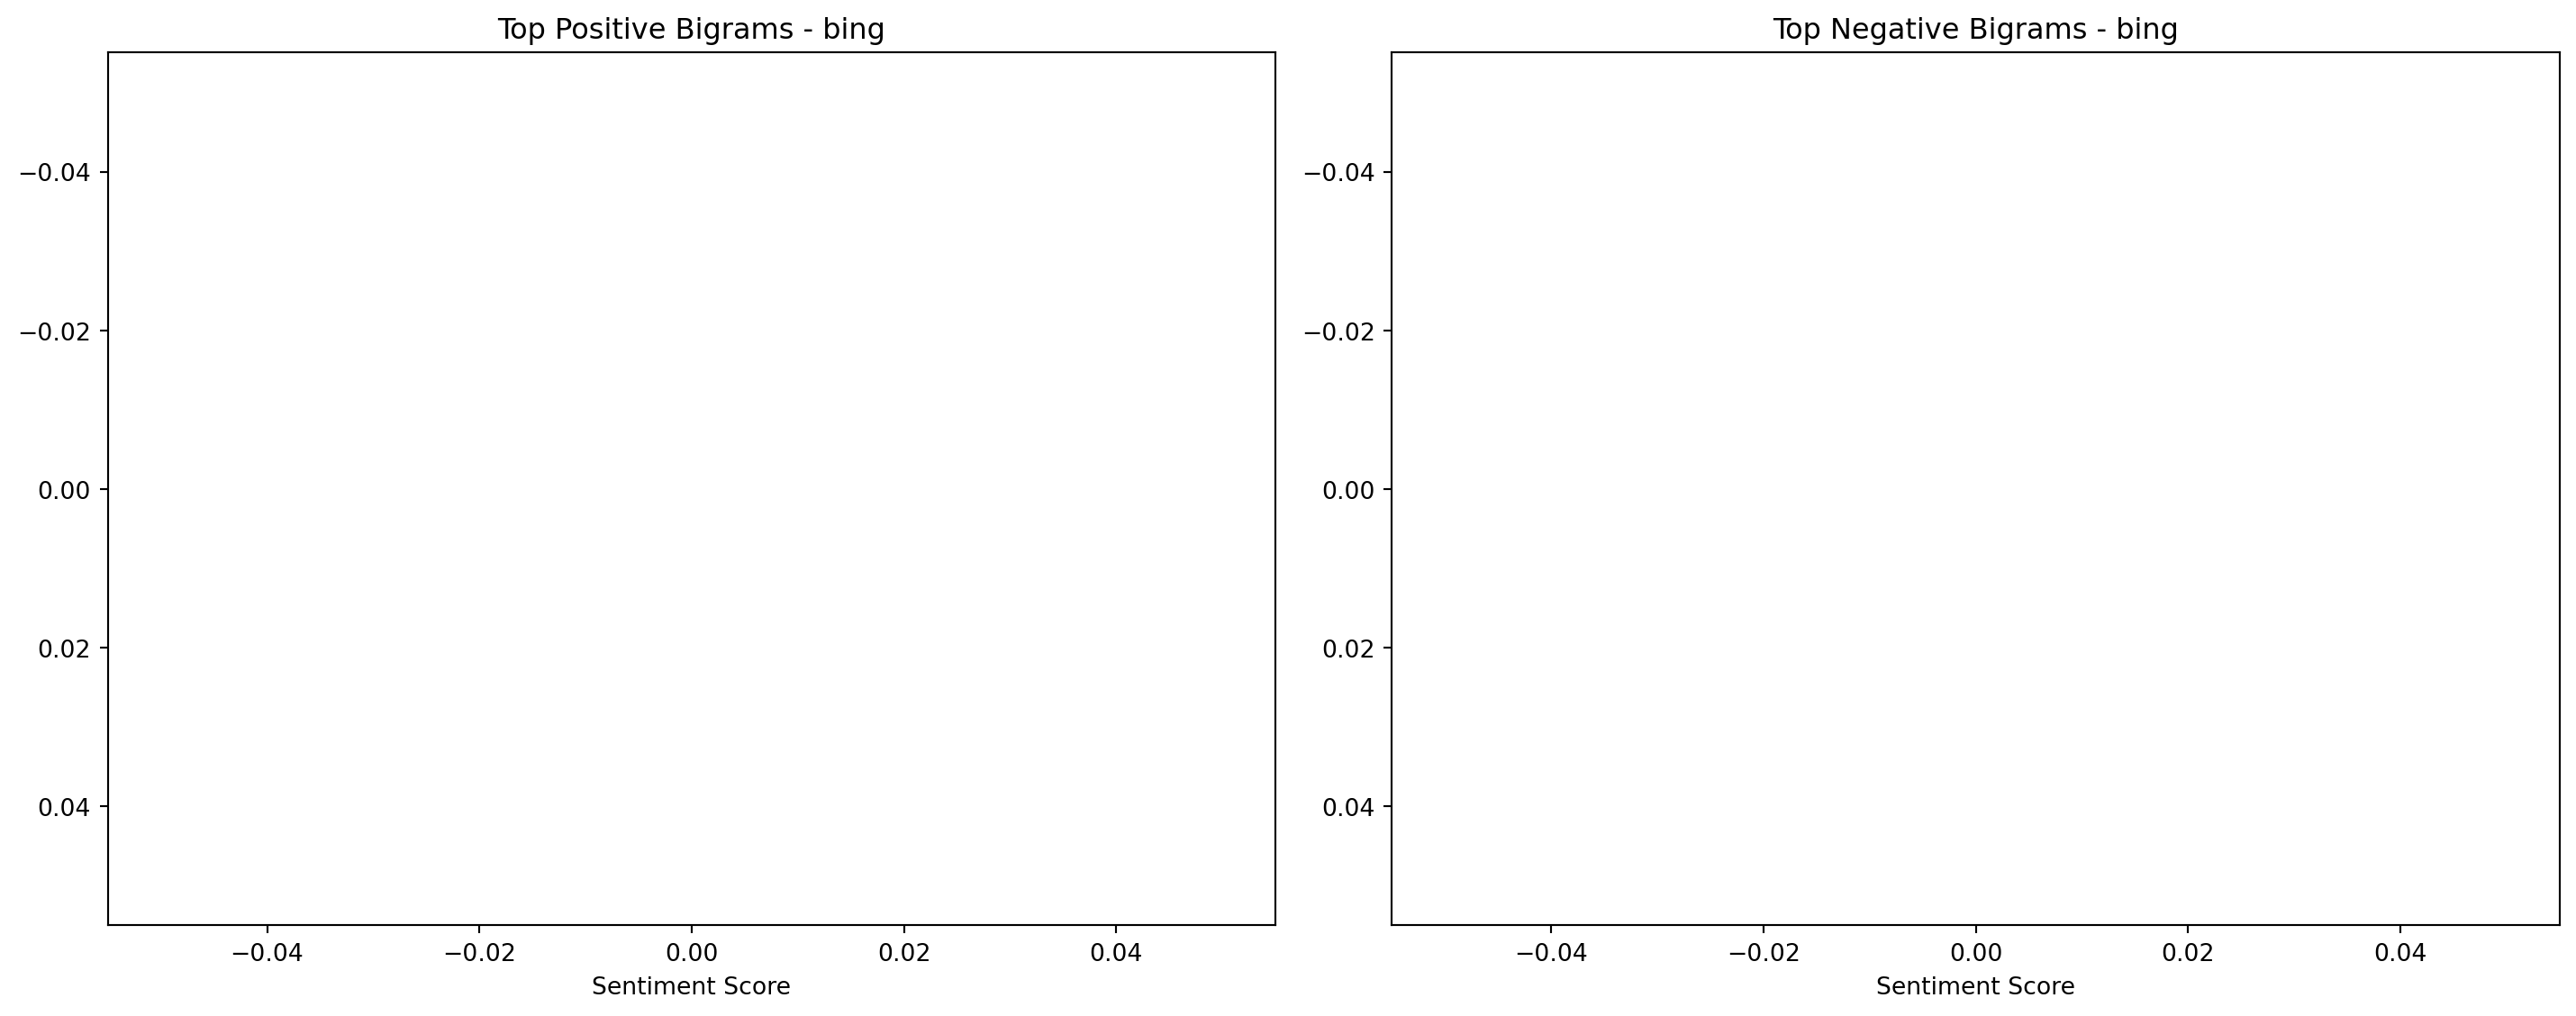

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon
from textblob import TextBlob
from afinn import Afinn
from nltk.util import bigrams
from itertools import chain

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert NLTK's part-of-speech tags to WordNet's part-of-speech tags
def get_wordnet_pos(word):
    """Map NLTK part of speech tags to WordNet part of speech tags."""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}
    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

# Clean the text, convert to lowercase, and lemmatize each word
def clean_text_bi(text):
    # Remove special characters: keep only letters, numbers, and basic punctuation
    text = re.sub(r'[.]', ' ', text)  # Replaces periods with spaces
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    text = text.lower()  # Convert to lowercase
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize each word with its POS tag
    lemmatized_words = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in words]
    
    return lemmatized_words

# Apply the cleaning and lemmatization to the dataset
sona_speeches_df['bigram_words'] = sona_speeches_df['speech'].apply(clean_text_bi)

# Initialize Afinn and prepare Bing lexicon
afinn = Afinn()
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to calculate sentiment scores using Afinn
def afinn_sentiment(text):
    return afinn.score(text)

# Function to calculate sentiment scores using Bing lexicon
def bing_sentiment(word):
    if word in positive_words:
        return 1  # Positive sentiment
    elif word in negative_words:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Function to get sentiment score for a bigram
def bigram_sentiment(bigram, lexicon_score_func):
    return lexicon_score_func(' '.join(bigram))

# Function to analyze the sentiment of bigrams
def analyze_bigram_sentiment(cleaned_words_list):
    bigram_list = list(bigrams(cleaned_words_list))
    
    # Calculate sentiment for each bigram
    tb_sentiments = [TextBlob(' '.join(bigram)).sentiment.polarity for bigram in bigram_list]
    afinn_sentiments = [afinn_sentiment(' '.join(bigram)) for bigram in bigram_list]
    bing_sentiments = [bigram_sentiment(bigram, bing_sentiment) for bigram in bigram_list]
    
    sentiment_data = pd.DataFrame({
        'bigram': [' '.join(bigram) for bigram in bigram_list],
        'textblob': tb_sentiments,
        'afinn': afinn_sentiments,
        'bing': bing_sentiments
    })
    
    return sentiment_data

# Apply the sentiment analysis for bigrams
all_bigram_sentiments = pd.concat([analyze_bigram_sentiment(words) for words in sona_speeches_df['bigram_words']])

# Group by bigram and calculate mean sentiment
aggregated_bigram_sentiments = all_bigram_sentiments.groupby('bigram').agg('mean').reset_index()

# Function to plot bar graphs for the bigrams that contribute most to sentiment
def plot_bigram_sentiment_words(sentiment_df, lexicon_name):
    top_positive_bigrams = sentiment_df[sentiment_df[lexicon_name] > 0].sort_values(by=lexicon_name, ascending=False).head(10)
    top_negative_bigrams = sentiment_df[sentiment_df[lexicon_name] < 0].sort_values(by=lexicon_name).head(10)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    axes[0].barh(top_positive_bigrams['bigram'], top_positive_bigrams[lexicon_name])
    axes[0].set_title(f'Top Positive Bigrams - {lexicon_name}')
    axes[0].invert_yaxis()  # labels read top-to-bottom
    axes[0].set_xlabel('Sentiment Score')

    axes[1].barh(top_negative_bigrams['bigram'], top_negative_bigrams[lexicon_name])
    axes[1].set_title(f'Top Negative Bigrams - {lexicon_name}')
    axes[1].invert_yaxis()  # labels read top-to-bottom
    axes[1].set_xlabel('Sentiment Score')

    plt.tight_layout()
    plt.show()

# Plot for each lexicon
plot_bigram_sentiment_words(aggregated_bigram_sentiments, 'textblob')
plot_bigram_sentiment_words(aggregated_bigram_sentiments, 'afinn')

# TODO: Fix Bing lexicon for bigrams
plot_bigram_sentiment_words(aggregated_bigram_sentiments, 'bing')


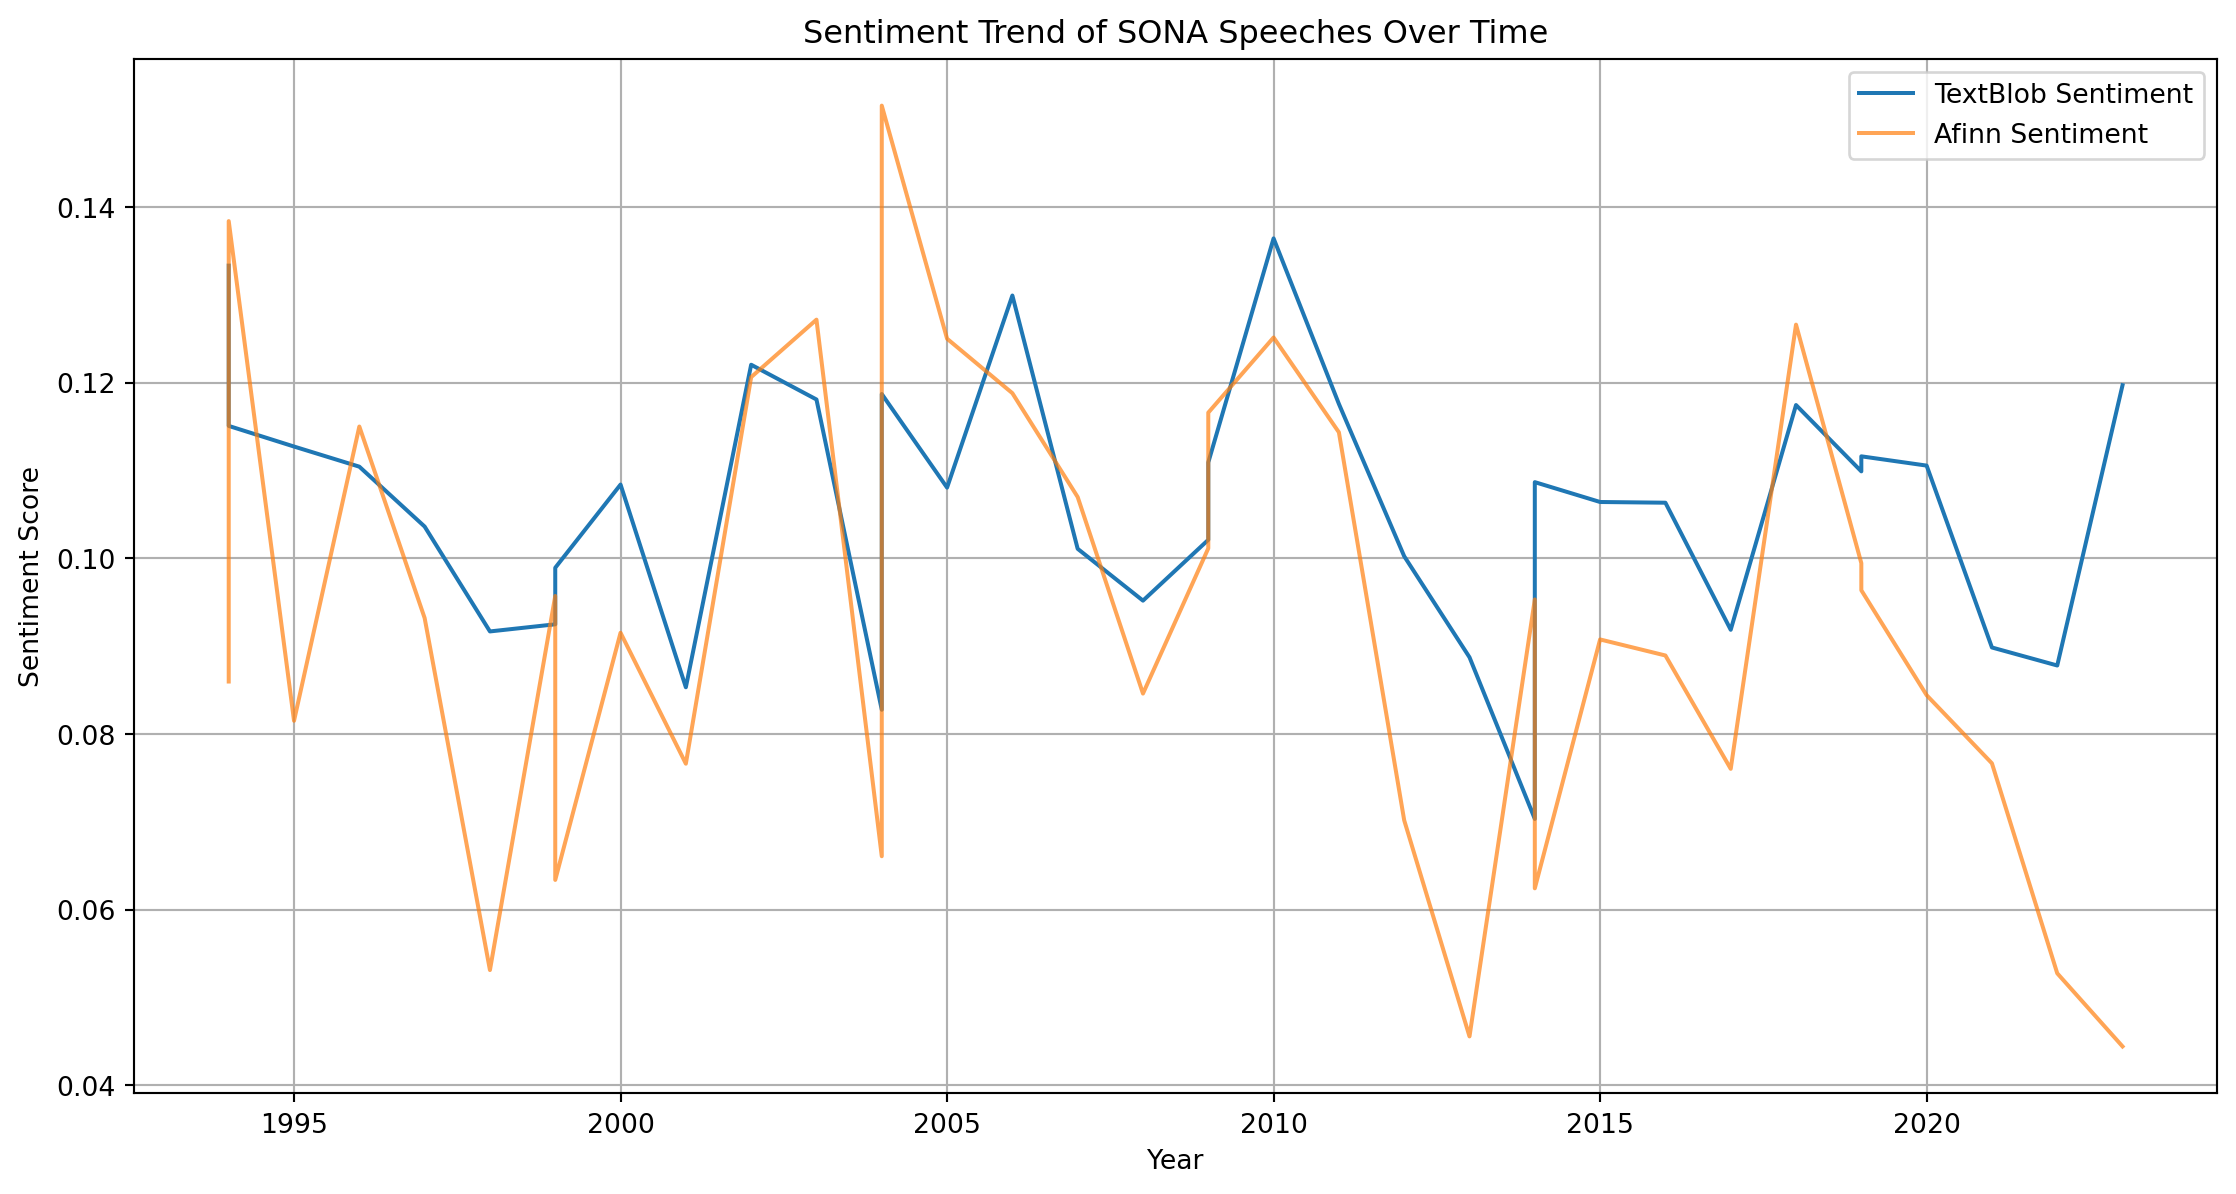

In [18]:
# Function to calculate overall sentiment for a speech using TextBlob
def textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Function to calculate overall sentiment for a speech using Afinn (normalized)
def afinn_sentiment(text):
    afinn = Afinn()
    words = text.split()  # Split text into words
    if len(words) > 0:   # Avoid division by zero
        return afinn.score(text) / len(words)  # Normalized score
    else:
        return 0


# Calculate sentiment scores
sona_speeches_df['textblob_sentiment'] = sona_speeches_df['speech'].apply(textblob_sentiment)
sona_speeches_df['afinn_sentiment'] = sona_speeches_df['speech'].apply(afinn_sentiment)

# Ensure the 'year' column is of type int if it's not already
sona_speeches_df['year'] = sona_speeches_df['year'].astype(int)

# Sort by year
sona_speeches_df.sort_values('year', inplace=True)

# Plotting the sentiment trend over time
plt.figure(figsize=(14, 7))

# TextBlob sentiment trend
plt.plot(sona_speeches_df['year'], sona_speeches_df['textblob_sentiment'], label='TextBlob Sentiment')

# Afinn sentiment trend
plt.plot(sona_speeches_df['year'], sona_speeches_df['afinn_sentiment'], label='Afinn Sentiment', alpha=0.7)

plt.title('Sentiment Trend of SONA Speeches Over Time')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Transformed on the words
bow_matrix_words = bow_vectorizer.fit_transform(sona_speeches_clean['speech'])
tfidf_matrix_words = tfidf_vectorizer.fit_transform(sona_speeches_clean['speech'])


In [20]:
b = 1

In [21]:
# This is similar to LSA, but with the LdaModel instead
# lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, gamma_threshold=1e-3)

# # Now you can print topics or save the model
# lda_model.print_topics()

In [22]:
# from gensim.utils import simple_preprocess

# # Tokenize the text
# tokenized_speeches = [simple_preprocess(speech) for speech in df['speech']]

# # Create a bag-of-words model for each speech
# bow_corpus = [dictionary.doc2bow(text) for text in tokenized_speeches]
# lda_model_bow = models.LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics)

# # LDA model using TF-IDF
# lda_model_tfidf = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# # Now you can print topics or save the models
# lda_model_bow.print_topics()
# lda_model_tfidf.print_topics()

In [23]:
# import tomotopy as tp

# # Initialize CTM
# ctm = tp.CTModel(k=10)  # Replace '10' with the number of topics you want

# # Add documents to the model
# for text in df['speech']:
#     ctm.add_doc(text.split())  # Make sure the texts are tokenized if necessary

# # Train the model
# ctm.train(0)
# for i in range(100):
#     ctm.train(10)
#     print('Iteration: {}\tLog-likelihood: {}'.format(i, ctm.ll_per_word))

# # Get the topics
# for i in range(ctm.k):
#     print("Topic #{}:".format(i), ctm.get_topic_words(i))


In [24]:
# from gensim.models import AuthorTopicModel

# # You need to create a mapping of authors (presidents) to documents
# author2doc = {author: [] for author in df['president'].unique()}
# for i, row in df.iterrows():
#     author2doc[row['president']].append(i)

# # Author-Topic LDA model
# author_topic_model = AuthorTopicModel(corpus=bow_corpus, author2doc=author2doc, id2word=dictionary, num_topics=num_topics)

# # Now you can print topics or save the model
# author_topic_model.print_topics()